## Problem Statement:

An E Commerce company provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.
You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.
Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you are giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation. Hence be very careful while providing campaign recommendation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_excel('E:\GL\Course Content\Capstone\Capstone Business Project\CC_EDTH_02_Customer Churn\Customer Churn Data.xlsx', 
                     sheet_name='Data for DSBA')
data.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [3]:
data.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [4]:
print('The number of rows (observations) is',data.shape[0],'\n''The number of columns (variables) is',data.shape[1])

The number of rows (observations) is 11260 
The number of columns (variables) is 19


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

## Check Missing Values in dataset

In [6]:
data.isnull().sum().sort_values(ascending=False)

cashback                   471
Day_Since_CC_connect       357
Complain_ly                357
Login_device               221
Marital_Status             212
CC_Agent_Score             116
City_Tier                  112
Account_user_count         112
Payment                    109
Gender                     108
CC_Contacted_LY            102
Tenure                     102
rev_per_month              102
Service_Score               98
account_segment             97
rev_growth_yoy               0
coupon_used_for_payment      0
Churn                        0
AccountID                    0
dtype: int64

In [7]:
data.isnull().sum().sum()

2676

In [8]:
data.size

213940

In [9]:
round((2676/213940)*100,2)

1.25

### Checking Duplicates

In [10]:
data.duplicated().sum()

0

### Summary

In [11]:
pd.options.display.float_format = '{:.2f}'.format 
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.00,NaN,NaN,NaN,25629.50,3250.63,20000.00,22814.75,25629.50,28444.25,31259.00
Churn,11260.00,NaN,NaN,NaN,0.17,0.37,0.00,0.00,0.00,0.00,1.00
Tenure,11158.00,38.00,1.00,1351.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.00,NaN,NaN,NaN,1.65,0.92,1.00,1.00,1.00,3.00,3.00
CC_Contacted_LY,11158.00,NaN,NaN,NaN,17.87,8.85,4.00,11.00,16.00,23.00,132.00
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.00,NaN,NaN,NaN,2.90,0.73,0.00,2.00,3.00,3.00,5.00
Account_user_count,11148.00,7.00,4.00,4569.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check Proportion of Target Variable (Churn)

In [12]:
data.Churn.value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [13]:
data.Churn.value_counts(normalize=True)

0   0.83
1   0.17
Name: Churn, dtype: float64

## EDA

In [15]:
data.Tenure.value_counts()

1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
4      403
5      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
30     137
28     137
99     131
27     131
26     122
#      116
29     114
25     114
31      96
50       2
51       2
60       2
61       2
Name: Tenure, dtype: int64

In [16]:
data.Tenure.unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [17]:
data.Tenure = data.Tenure.replace('#', np.NaN)

In [18]:
data.Tenure.unique()

array([ 4.,  0.,  2., 13., 11., nan,  9., 99., 19., 20., 14.,  8., 26.,
       18.,  5., 30.,  7.,  1., 23.,  3., 29.,  6., 28., 24., 25., 16.,
       10., 15., 22., 27., 12., 21., 17., 50., 60., 31., 51., 61.])

In [19]:
data.Tenure.isnull().sum()

218

In [20]:
data.City_Tier.value_counts()

1.00    7263
3.00    3405
2.00     480
Name: City_Tier, dtype: int64

In [21]:
data.City_Tier.unique()

array([ 3.,  1., nan,  2.])

In [22]:
data.City_Tier.isnull().sum()

112

In [23]:
data.CC_Contacted_LY.value_counts()

14.00     682
16.00     663
9.00      655
13.00     655
15.00     623
12.00     571
8.00      538
17.00     525
11.00     524
10.00     489
7.00      391
18.00     374
19.00     364
20.00     319
6.00      311
21.00     310
22.00     282
23.00     241
24.00     214
25.00     197
32.00     192
29.00     181
34.00     178
28.00     178
30.00     175
27.00     174
26.00     169
31.00     165
35.00     165
33.00     155
36.00     148
37.00      96
38.00      73
39.00      55
40.00      46
42.00      30
41.00      29
5.00        8
43.00       8
4.00        1
129.00      1
132.00      1
127.00      1
126.00      1
Name: CC_Contacted_LY, dtype: int64

In [24]:
data.CC_Contacted_LY.unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [25]:
data.CC_Contacted_LY.isnull().sum()

102

In [26]:
data.Payment.value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [27]:
data.Payment.unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [28]:
data.Payment.isnull().sum()

109

In [29]:
data.Gender.value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [30]:
data.Gender = data.Gender.replace("M", 'Male').replace("F", 'Female')

In [31]:
data.Gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [32]:
data.Gender.isnull().sum()

108

In [33]:
data.Service_Score.value_counts()

3.00    5490
2.00    3251
4.00    2331
1.00      77
0.00       8
5.00       5
Name: Service_Score, dtype: int64

In [34]:
data.Service_Score.unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [35]:
data.Service_Score.isnull().sum()

98

In [36]:
data.Account_user_count.value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [37]:
data.Account_user_count.unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [38]:
data.Account_user_count.isnull().sum()

112

In [39]:
data.Account_user_count = data.Account_user_count.replace('@', np.NaN)

In [40]:
data.Account_user_count.unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [41]:
data.Account_user_count.isnull().sum()

444

In [42]:
data.account_segment.value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [43]:
data.account_segment = data.account_segment.replace("Regular +", 'Regular Plus').replace("Super +", 'Super Plus')

In [44]:
data.account_segment.unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', nan, 'Super Plus'],
      dtype=object)

In [45]:
data.account_segment.isnull().sum()

97

In [46]:
data.CC_Agent_Score.value_counts()

3.00    3360
1.00    2302
5.00    2191
4.00    2127
2.00    1164
Name: CC_Agent_Score, dtype: int64

In [47]:
data.CC_Agent_Score.unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [48]:
data.CC_Agent_Score.isnull().sum()

116

In [49]:
data.Marital_Status.value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [50]:
data.Marital_Status.unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [51]:
data.Marital_Status.isnull().sum()

212

In [52]:
data.rev_per_month.value_counts()

3      1746
2      1585
5      1337
4      1218
6      1085
7       754
+       689
8       643
9       564
10      413
1       402
11      278
12      166
13       93
14       48
15       24
102       8
124       5
123       5
107       5
140       4
136       4
133       4
129       4
118       4
115       3
138       3
119       3
126       3
130       3
127       3
137       3
101       3
117       3
108       3
116       3
110       3
113       3
105       2
134       2
22        2
114       2
125       2
19        2
139       2
120       2
121       2
131       2
135       1
21        1
122       1
20        1
23        1
25        1
100       1
103       1
104       1
111       1
109       1
Name: rev_per_month, dtype: int64

In [53]:
data.rev_per_month.unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [54]:
data.rev_per_month.isnull().sum()

102

In [55]:
data.rev_per_month = data.rev_per_month.replace('+', np.NaN)

In [56]:
data.rev_per_month.unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [57]:
data.rev_per_month.isnull().sum()

791

In [58]:
data.Complain_ly.value_counts()

0.00    7792
1.00    3111
Name: Complain_ly, dtype: int64

In [59]:
data.Complain_ly.unique()

array([ 1.,  0., nan])

In [60]:
data.Complain_ly.isnull().sum()

357

In [61]:
data.rev_growth_yoy.value_counts()

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
$        3
4        3
Name: rev_growth_yoy, dtype: int64

In [62]:
data.rev_growth_yoy.unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [63]:
data.rev_growth_yoy = data.rev_growth_yoy.replace('$', np.NaN)

In [64]:
data.rev_growth_yoy.unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [65]:
data.rev_growth_yoy.isnull().sum()

3

In [66]:
data.coupon_used_for_payment.value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
9       34
10      34
11      30
12      26
13      22
14      12
15       4
16       4
*        1
$        1
#        1
Name: coupon_used_for_payment, dtype: int64

In [67]:
data.coupon_used_for_payment.unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [68]:
data.coupon_used_for_payment.isnull().sum()

0

In [69]:
data.coupon_used_for_payment = data.coupon_used_for_payment.replace('#', np.NaN).replace('$', np.NaN).replace('*', np.NaN)

In [70]:
data.coupon_used_for_payment.unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

In [71]:
data.rev_growth_yoy.isnull().sum()

3

In [72]:
data.Day_Since_CC_connect.value_counts()

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
47       2
30       2
31       2
46       1
$        1
Name: Day_Since_CC_connect, dtype: int64

In [73]:
data.Day_Since_CC_connect.unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [74]:
data.Day_Since_CC_connect.isnull().sum()

357

In [75]:
data.Day_Since_CC_connect = data.Day_Since_CC_connect.replace('$', np.NaN)

In [76]:
data.Day_Since_CC_connect.unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [77]:
data.Day_Since_CC_connect.isnull().sum()

358

In [78]:
data.cashback.value_counts()

155.62                10
149.36                 9
152.28                 9
154.73                 9
149.68                 9
145.08                 9
128.19                 8
123.41999999999999     8
152.07                 8
153.04                 8
130.72                 8
154.1                  8
165                    8
148.77                 8
148.42                 8
149.04                 7
150.59                 7
124.03999999999999     7
151.1                  7
162.6                  7
163.97                 7
188.47                 7
149.07                 7
155.38                 7
148.4                  7
146.27                 7
161.42                 7
154.67                 7
148.8                  7
161.62                 7
152.06                 7
193.04                 7
174.36                 7
200.96                 7
180.62                 7
129.36                 7
152.04                 7
154.6                  7
149.78                 7
154.72                 7


In [79]:
data.cashback.unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [80]:
data.cashback.isnull().sum()

471

In [81]:
data.cashback = data.cashback.replace('$', np.NaN)

In [82]:
data.cashback.unique()

array([159.93, 120.9 ,    nan, ..., 227.36, 226.91, 191.42])

In [83]:
data.cashback.isnull().sum()

473

In [84]:
data.Login_device.value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [85]:
data.Login_device.unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [86]:
data.Login_device.isnull().sum()

221

In [87]:
data.Login_device = data.Login_device.replace('&&&&', np.NaN)

In [88]:
data.Login_device.unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [89]:
data.Login_device.isnull().sum()

760

In [90]:
data.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [91]:
data.isnull().sum().sum()

4361

In [92]:
data.size

213940

In [93]:
round((4361/213940)*100,2)

2.04

In [94]:
data.isnull().sum().sort_values(ascending = False)/data.index.size

rev_per_month             0.07
Login_device              0.07
cashback                  0.04
Account_user_count        0.04
Day_Since_CC_connect      0.03
Complain_ly               0.03
Tenure                    0.02
Marital_Status            0.02
CC_Agent_Score            0.01
City_Tier                 0.01
Payment                   0.01
Gender                    0.01
CC_Contacted_LY           0.01
Service_Score             0.01
account_segment           0.01
rev_growth_yoy            0.00
coupon_used_for_payment   0.00
Churn                     0.00
AccountID                 0.00
dtype: float64

### Modified Data Type

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

### Impute Missing Values

<AxesSubplot:xlabel='Tenure'>

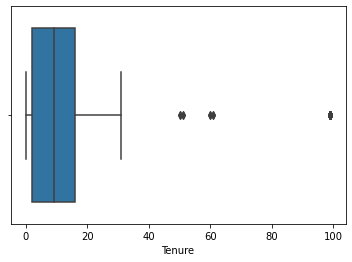

In [96]:
sns.boxplot(x='Tenure', data=data)

In [97]:
data.Tenure.median()

9.0

In [98]:
data[data.Tenure == 9].shape[0]

496

In [99]:
data.Tenure.isnull().sum()

218

In [100]:
data.Tenure = data.Tenure.fillna(data.Tenure.median())
data[data.Tenure.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [101]:
data[data.Tenure == 9].shape[0]

714

In [314]:
data.Tenure = data.Tenure.astype('int64')

In [315]:
data.Tenure.dtype

dtype('int64')

<AxesSubplot:xlabel='CC_Contacted_LY'>

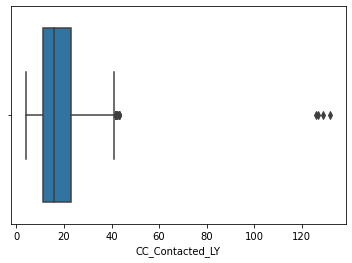

In [102]:
sns.boxplot(x='CC_Contacted_LY', data=data)

In [103]:
data.CC_Contacted_LY.median()

16.0

In [104]:
data[data.CC_Contacted_LY == 16].shape[0]

663

In [105]:
data.CC_Contacted_LY.isnull().sum()

102

In [106]:
data.CC_Contacted_LY = data.CC_Contacted_LY.fillna(data.CC_Contacted_LY.median())
data[data.CC_Contacted_LY.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [107]:
data[data.CC_Contacted_LY == 16].shape[0]

765

In [108]:
data.CC_Contacted_LY = data.CC_Contacted_LY.astype('int64')

In [109]:
data.CC_Contacted_LY.dtype

dtype('int64')

<AxesSubplot:xlabel='Account_user_count'>

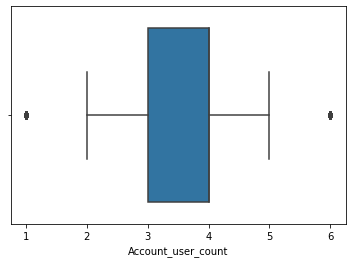

In [110]:
sns.boxplot(x='Account_user_count', data=data)

In [111]:
data.Account_user_count.median()

4.0

In [112]:
data[data.Account_user_count == 4].shape[0]

4569

In [113]:
data.Account_user_count.isnull().sum()

444

In [114]:
data.Account_user_count = data.Account_user_count.fillna(data.Account_user_count.median())
data[data.Account_user_count.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [115]:
data[data.Account_user_count == 4].shape[0]

5013

In [116]:
data.Account_user_count = data.Account_user_count.astype('int64')

In [117]:
data.Account_user_count.dtype

dtype('int64')

<AxesSubplot:xlabel='rev_per_month'>

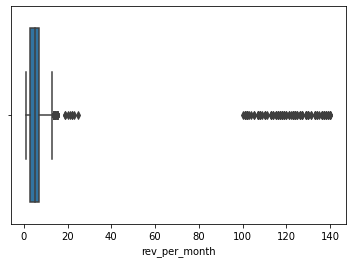

In [118]:
sns.boxplot(x='rev_per_month', data=data)

In [119]:
data.rev_per_month.median()

5.0

In [120]:
data[data.rev_per_month == 5].shape[0]

1337

In [121]:
data.rev_per_month.isnull().sum()

791

In [122]:
data.rev_per_month = data.rev_per_month.fillna(data.rev_per_month.median())
data[data.rev_per_month.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [123]:
data[data.rev_per_month == 5].shape[0]

2128

In [124]:
data.rev_per_month = data.rev_per_month.astype('int64')

In [125]:
data.rev_per_month.dtype

dtype('int64')

<AxesSubplot:xlabel='rev_growth_yoy'>

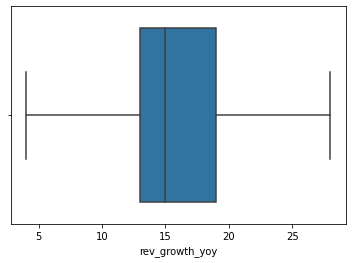

In [126]:
sns.boxplot(x='rev_growth_yoy', data=data)

In [134]:
data.rev_growth_yoy.describe()

count   11260.00
mean       16.19
std         3.76
min         4.00
25%        13.00
50%        15.00
75%        19.00
max        28.00
Name: rev_growth_yoy, dtype: float64

In [127]:
data.rev_growth_yoy.median()

15.0

In [128]:
data[data.rev_growth_yoy == 15].shape[0]

1283

In [129]:
data.rev_growth_yoy.isnull().sum()

3

In [130]:
data.rev_growth_yoy = data.rev_growth_yoy.fillna(data.rev_growth_yoy.median())
data[data.rev_growth_yoy.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [131]:
data[data.rev_growth_yoy == 15].shape[0]

1286

In [132]:
data.rev_growth_yoy = data.rev_growth_yoy.astype('int64')

In [133]:
data.rev_growth_yoy.dtype

dtype('int64')

<AxesSubplot:xlabel='coupon_used_for_payment'>

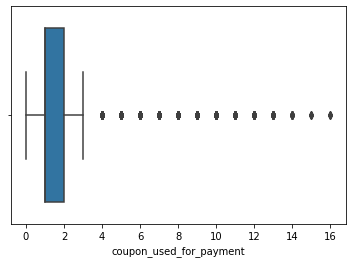

In [135]:
sns.boxplot(x='coupon_used_for_payment', data=data)

In [136]:
data.coupon_used_for_payment.median()

1.0

In [137]:
data[data.coupon_used_for_payment == 1].shape[0]

4373

In [138]:
data.coupon_used_for_payment.isnull().sum()

3

In [139]:
data.coupon_used_for_payment = data.coupon_used_for_payment.fillna(data.coupon_used_for_payment.median())
data[data.coupon_used_for_payment.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [140]:
data[data.coupon_used_for_payment == 1].shape[0]

4376

In [141]:
data.coupon_used_for_payment = data.coupon_used_for_payment.astype('int64')

In [142]:
data.coupon_used_for_payment.dtype

dtype('int64')

<AxesSubplot:xlabel='Day_Since_CC_connect'>

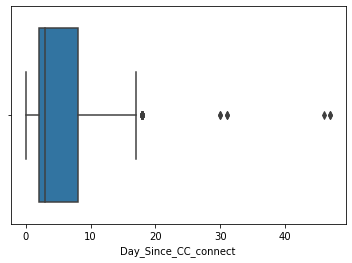

In [143]:
sns.boxplot(x='Day_Since_CC_connect', data=data)

In [144]:
data.Day_Since_CC_connect.median()

3.0

In [145]:
data[data.Day_Since_CC_connect == 3].shape[0]

1816

In [146]:
data.Day_Since_CC_connect.isnull().sum()

358

In [147]:
data.Day_Since_CC_connect = data.Day_Since_CC_connect.fillna(data.Day_Since_CC_connect.median())
data[data.Day_Since_CC_connect.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [148]:
data[data.Day_Since_CC_connect == 3].shape[0]

2174

In [149]:
data.Day_Since_CC_connect = data.Day_Since_CC_connect.astype('int64')

In [150]:
data.Day_Since_CC_connect.dtype

dtype('int64')

<AxesSubplot:xlabel='cashback'>

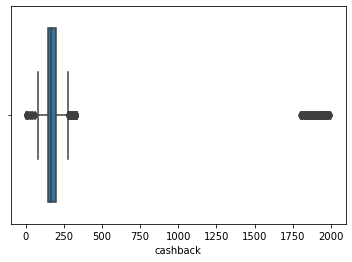

In [151]:
sns.boxplot(x='cashback', data=data)

In [152]:
data.cashback.median()

165.25

In [153]:
data.cashback.isnull().sum()

473

In [154]:
data.cashback = data.cashback.fillna(data.cashback.median())
data[data.cashback.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [155]:
data.cashback.dtype

dtype('float64')

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11260 non-null  int64  
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11260 non-null  int64  
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11260 non-null  int64  
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [157]:
data.City_Tier.isnull().sum()

112

In [158]:
data.City_Tier.mode()

0   1.00
dtype: float64

In [159]:
data[data.City_Tier == 1].shape[0]

7263

In [160]:
data.City_Tier = data.City_Tier.fillna(data.City_Tier.mode()[0])
data[data.City_Tier.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [161]:
data[data.City_Tier == 1].shape[0]

7375

In [162]:
data.City_Tier = data.City_Tier.astype('int64')

In [163]:
data.City_Tier.dtype

dtype('int64')

In [164]:
data.Service_Score.isnull().sum()

98

In [165]:
data.Service_Score.mode()

0   3.00
dtype: float64

In [166]:
data[data.Service_Score == 3].shape[0]

5490

In [167]:
data.Service_Score = data.Service_Score.fillna(data.Service_Score.mode()[0])
data[data.Service_Score.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [168]:
data[data.Service_Score == 3].shape[0]

5588

In [169]:
data.Service_Score = data.Service_Score.astype('int64')

In [170]:
data.Service_Score.dtype

dtype('int64')

In [171]:
data.CC_Agent_Score.isnull().sum()

116

In [172]:
data.CC_Agent_Score.mode()

0   3.00
dtype: float64

In [173]:
data[data.CC_Agent_Score == 3].shape[0]

3360

In [174]:
data.CC_Agent_Score = data.CC_Agent_Score.fillna(data.CC_Agent_Score.mode()[0])
data[data.CC_Agent_Score.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [175]:
data[data.CC_Agent_Score == 3].shape[0]

3476

In [176]:
data.CC_Agent_Score = data.CC_Agent_Score.astype('int64')

In [177]:
data.CC_Agent_Score.dtype

dtype('int64')

In [178]:
data.Complain_ly.isnull().sum()

357

In [179]:
data.Complain_ly.mode()

0   0.00
dtype: float64

In [180]:
data[data.Complain_ly == 0].shape[0]

7792

In [181]:
data.Complain_ly = data.Complain_ly.fillna(data.Complain_ly.mode()[0])
data[data.Complain_ly.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [182]:
data[data.Complain_ly == 0].shape[0]

8149

In [183]:
data.Complain_ly = data.Complain_ly.astype('int64')

In [184]:
data.Complain_ly.dtype

dtype('int64')

In [185]:
data.Payment.isnull().sum()

109

In [186]:
data.Payment.mode()

0    Debit Card
dtype: object

In [187]:
data.Payment.describe()

count          11151
unique             5
top       Debit Card
freq            4587
Name: Payment, dtype: object

In [188]:
data.Payment = data.Payment.fillna(data.Payment.mode()[0])
data[data.Payment.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [189]:
data.Payment.describe()

count          11260
unique             5
top       Debit Card
freq            4696
Name: Payment, dtype: object

In [190]:
data.Gender.isnull().sum()

108

In [191]:
data.Gender.mode()

0    Male
dtype: object

In [192]:
data.Gender.describe()

count     11152
unique        2
top        Male
freq       6704
Name: Gender, dtype: object

In [193]:
data.Gender = data.Gender.fillna(data.Gender.mode()[0])
data[data.Gender.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [194]:
data.Gender.describe()

count     11260
unique        2
top        Male
freq       6812
Name: Gender, dtype: object

In [195]:
data.account_segment.isnull().sum()

97

In [196]:
data.account_segment.mode()

0    Regular Plus
dtype: object

In [197]:
data.account_segment.describe()

count            11163
unique               5
top       Regular Plus
freq              4124
Name: account_segment, dtype: object

In [198]:
data.account_segment = data.account_segment.fillna(data.account_segment.mode()[0])
data[data.account_segment.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [199]:
data.account_segment.describe()

count            11260
unique               5
top       Regular Plus
freq              4221
Name: account_segment, dtype: object

In [200]:
data.Marital_Status.isnull().sum()

212

In [201]:
data.Marital_Status.mode()

0    Married
dtype: object

In [202]:
data.Marital_Status.describe()

count       11048
unique          3
top       Married
freq         5860
Name: Marital_Status, dtype: object

In [203]:
data.Marital_Status = data.Marital_Status.fillna(data.Marital_Status.mode()[0])
data[data.Marital_Status.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [204]:
data.Marital_Status.describe()

count       11260
unique          3
top       Married
freq         6072
Name: Marital_Status, dtype: object

In [205]:
data.Login_device.isnull().sum()

760

In [206]:
data.Login_device.mode()

0    Mobile
dtype: object

In [207]:
data.Login_device.describe()

count      10500
unique         2
top       Mobile
freq        7482
Name: Login_device, dtype: object

In [208]:
data.Login_device = data.Login_device.fillna(data.Login_device.mode()[0])
data[data.Login_device.isnull()]

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [209]:
data.Login_device.describe()

count      11260
unique         2
top       Mobile
freq        8242
Name: Login_device, dtype: object

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  int64  
 3   City_Tier                11260 non-null  int64  
 4   CC_Contacted_LY          11260 non-null  int64  
 5   Payment                  11260 non-null  object 
 6   Gender                   11260 non-null  object 
 7   Service_Score            11260 non-null  int64  
 8   Account_user_count       11260 non-null  int64  
 9   account_segment          11260 non-null  object 
 10  CC_Agent_Score           11260 non-null  int64  
 11  Marital_Status           11260 non-null  object 
 12  rev_per_month            11260 non-null  int64  
 13  Complain_ly              11260 non-null  int64  
 14  rev_growth_yoy        

In [254]:
data.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

## Summary

In [211]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.00,25629.50,3250.63,20000.00,22814.75,25629.50,28444.25,31259.00
Churn,11260.00,0.17,0.37,0.00,0.00,0.00,0.00,1.00
Tenure,11260.00,10.99,12.76,0.00,2.00,9.00,16.00,99.00
City_Tier,11260.00,1.65,0.91,1.00,1.00,1.00,3.00,3.00
CC_Contacted_LY,11260.00,17.85,8.81,4.00,11.00,16.00,23.00,132.00
Service_Score,11260.00,2.90,0.72,0.00,2.00,3.00,3.00,5.00
Account_user_count,11260.00,3.70,1.00,1.00,3.00,4.00,4.00,6.00
CC_Agent_Score,11260.00,3.07,1.37,1.00,2.00,3.00,4.00,5.00
rev_per_month,11260.00,6.27,11.49,1.00,3.00,5.00,7.00,140.00
Complain_ly,11260.00,0.28,0.45,0.00,0.00,0.00,1.00,1.00


In [212]:
data.describe(include = 'object')

,Payment,Gender,account_segment,Marital_Status,Login_device
count,11260,11260,11260,11260,11260
unique,5,2,5,3,2
top,Debit Card,Male,Regular Plus,Married,Mobile
freq,4696,6812,4221,6072,8242


## Univariate Analysis (Numerical Variables)

In [217]:
cont = data.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(cont.columns.values)
len(lstnumericcolumns)

14

AccountID
Skew: 0.0


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


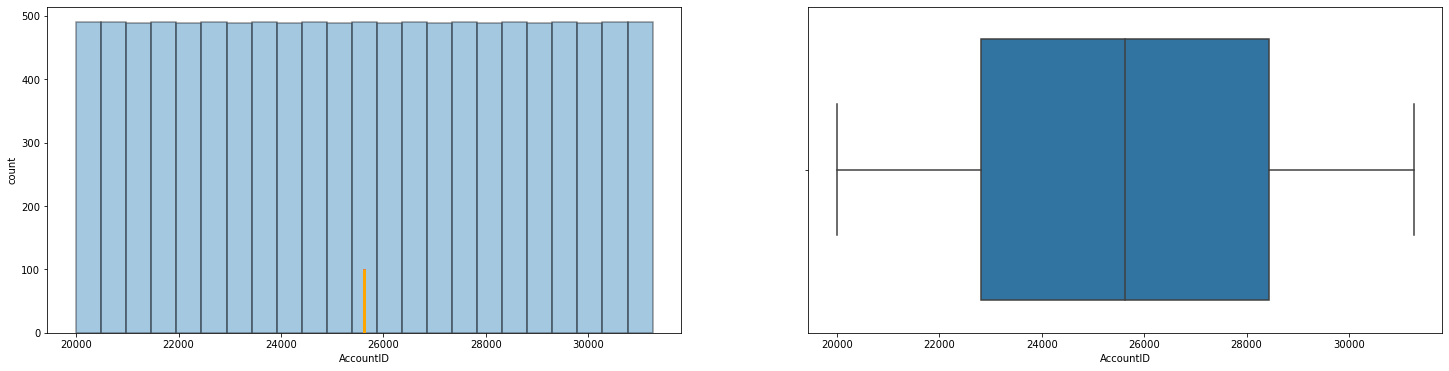

Churn
Skew: 1.77


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


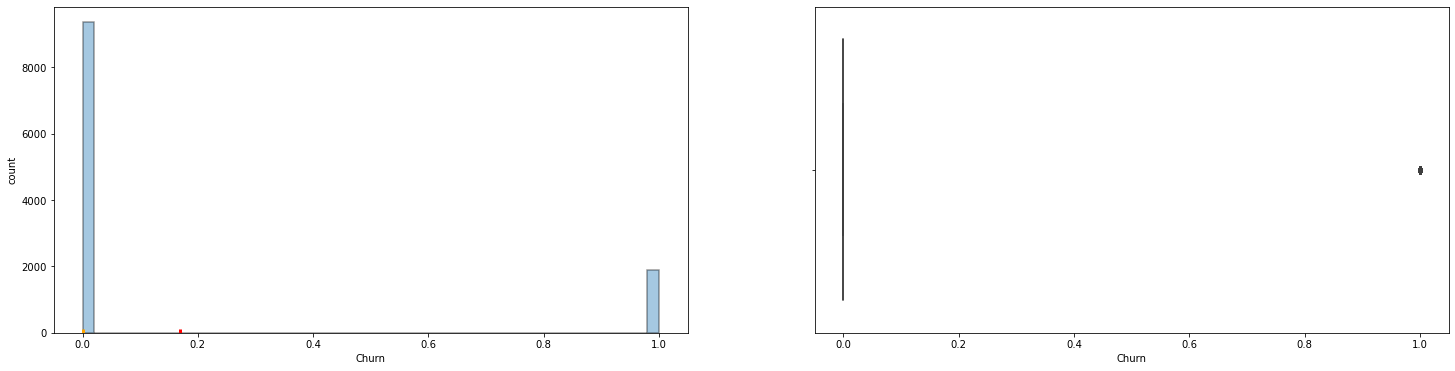

Tenure
Skew: 3.94


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


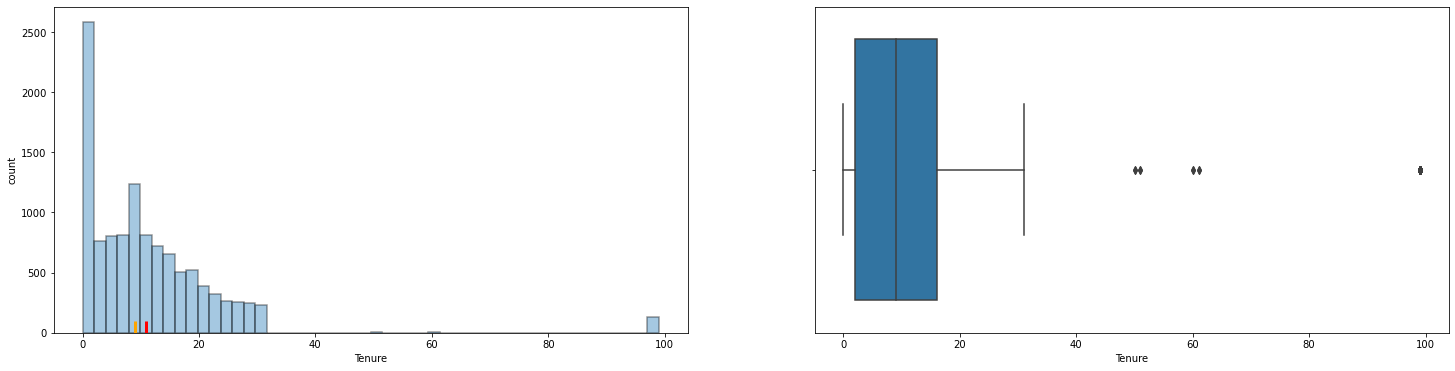

City_Tier
Skew: 0.75


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


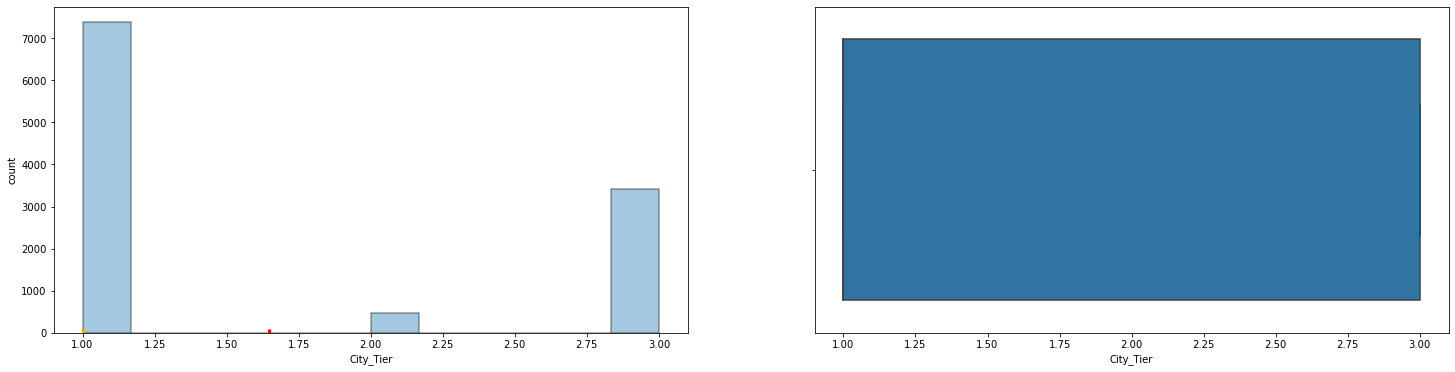

CC_Contacted_LY
Skew: 1.43


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


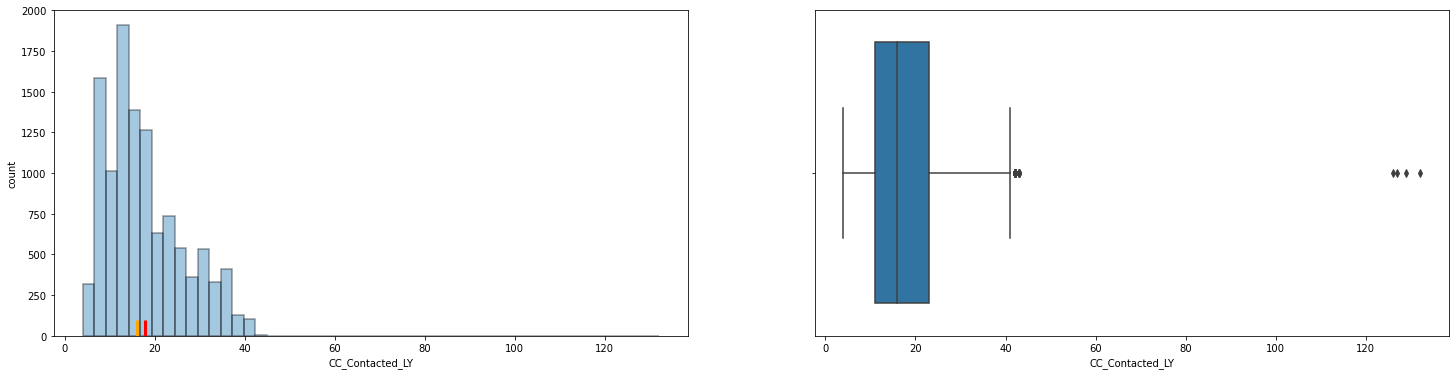

Service_Score
Skew: 0.0


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


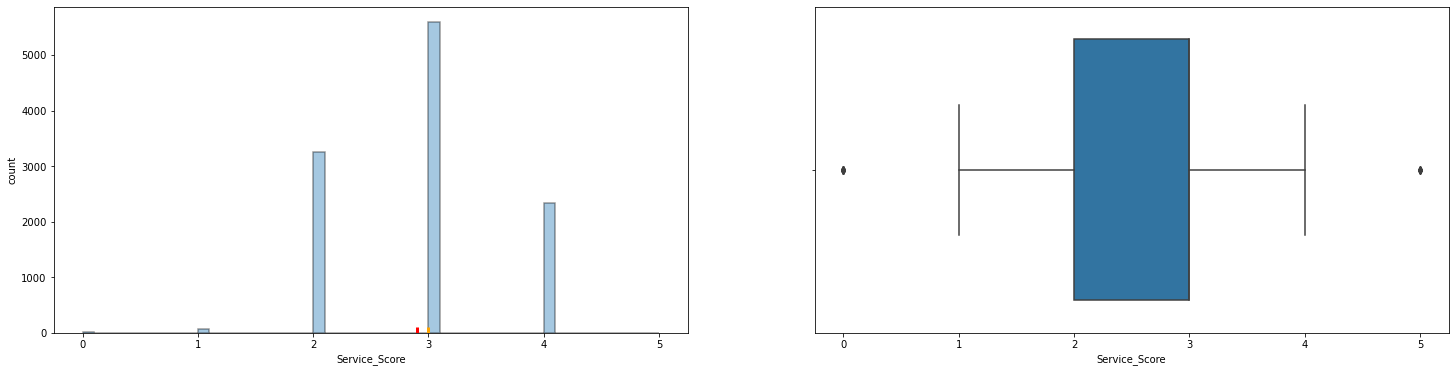

Account_user_count
Skew: -0.43


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


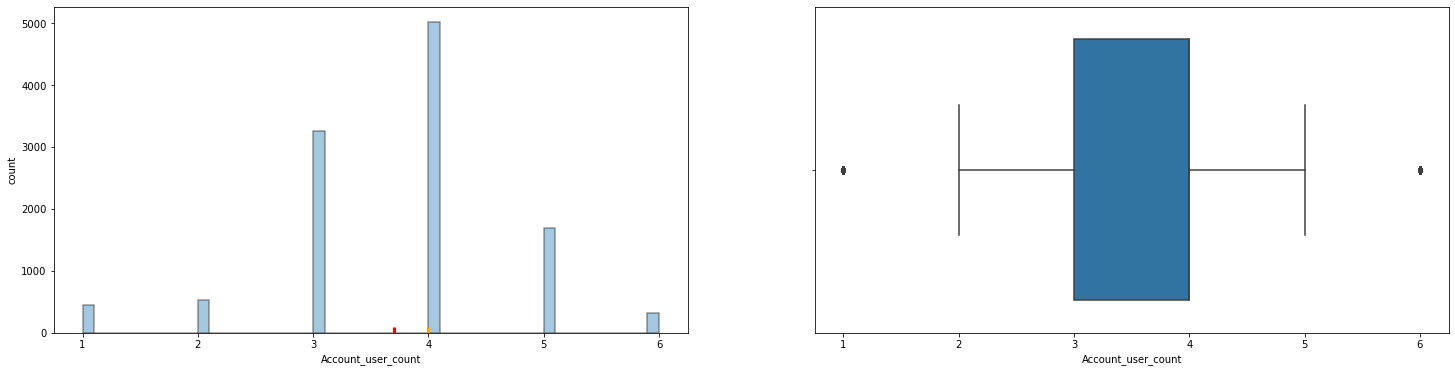

CC_Agent_Score
Skew: -0.14


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


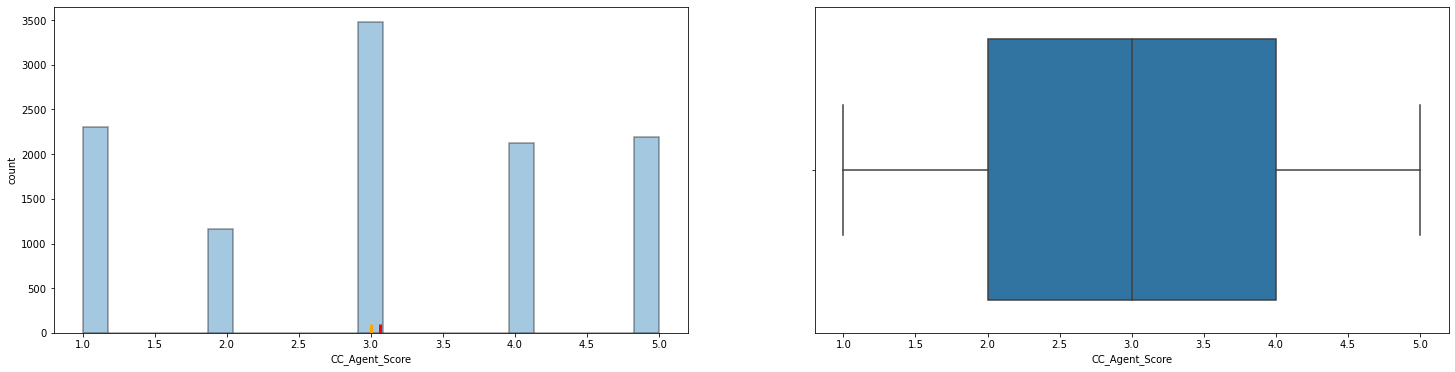

rev_per_month
Skew: 9.44


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


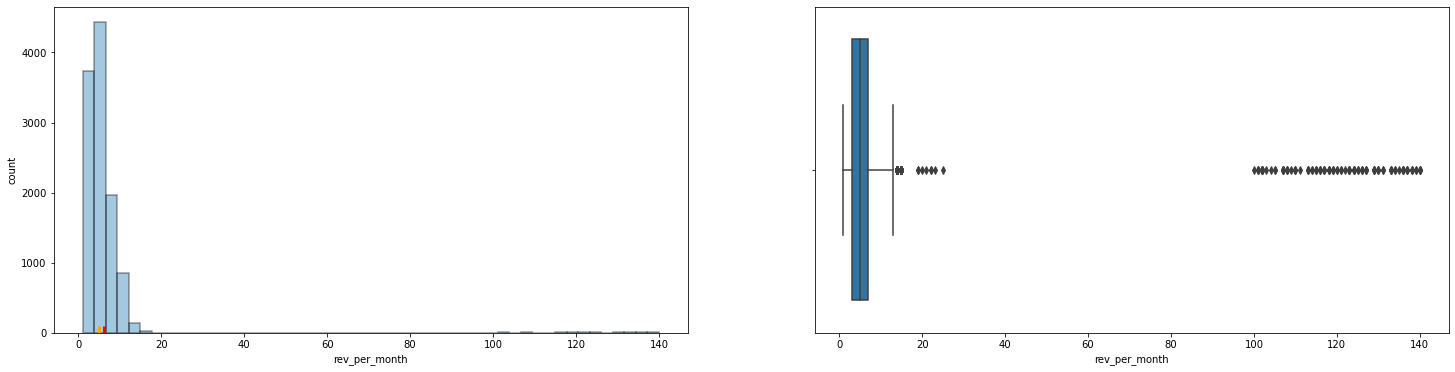

Complain_ly
Skew: 1.0


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


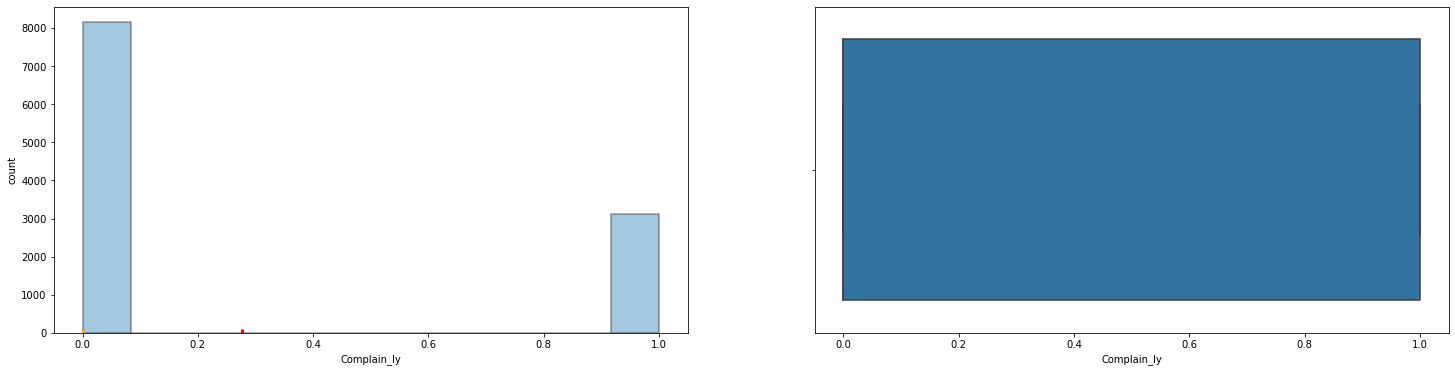

rev_growth_yoy
Skew: 0.75


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


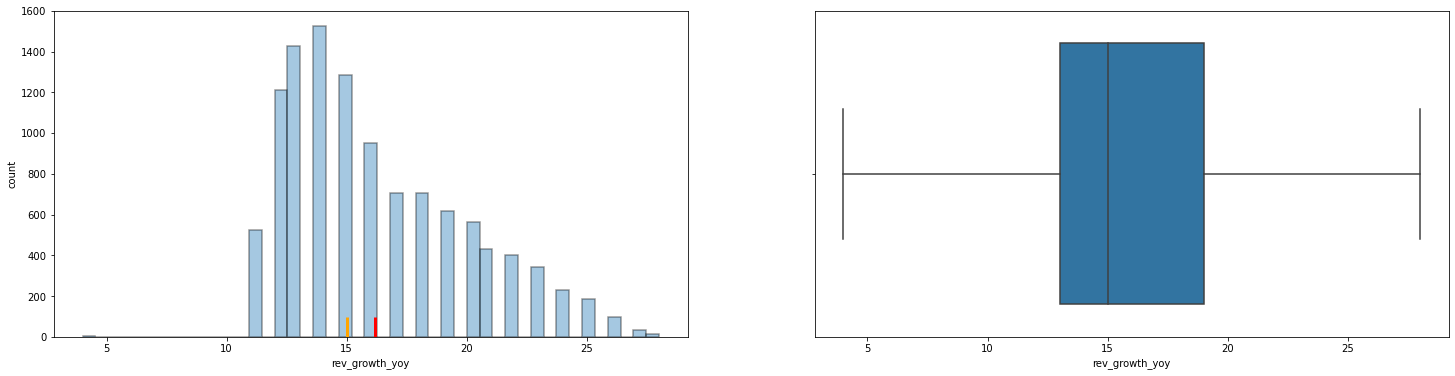

coupon_used_for_payment
Skew: 2.58


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


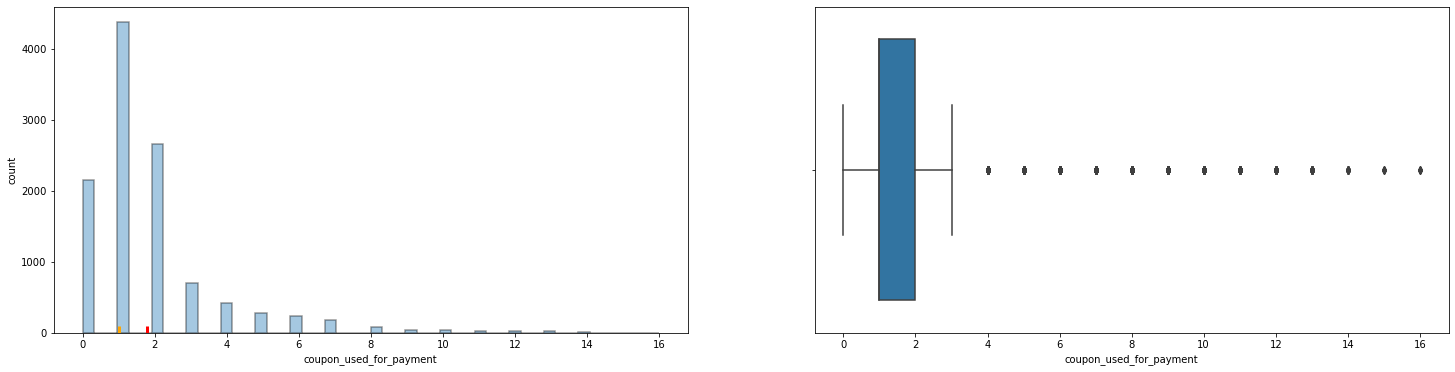

Day_Since_CC_connect
Skew: 1.32


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


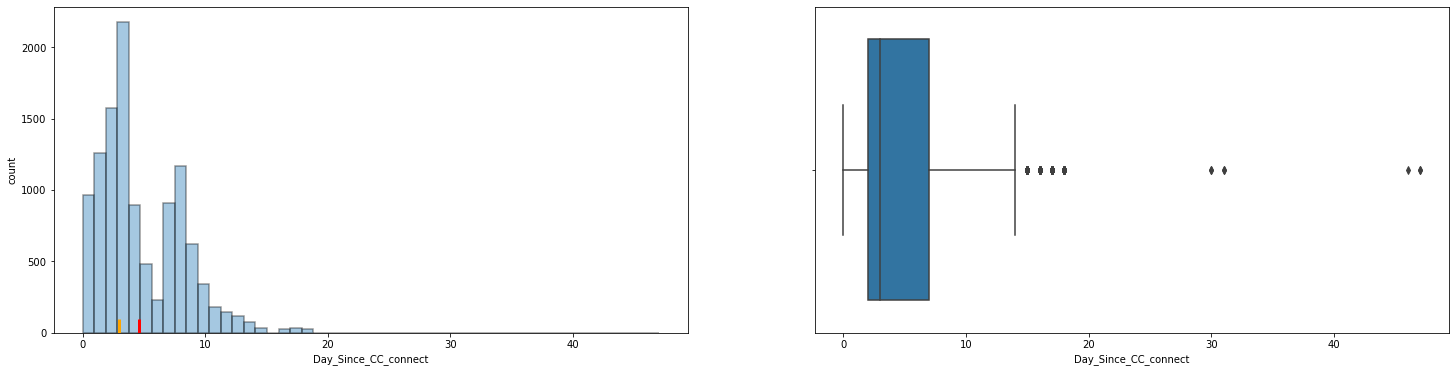

cashback
Skew: 8.97


C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


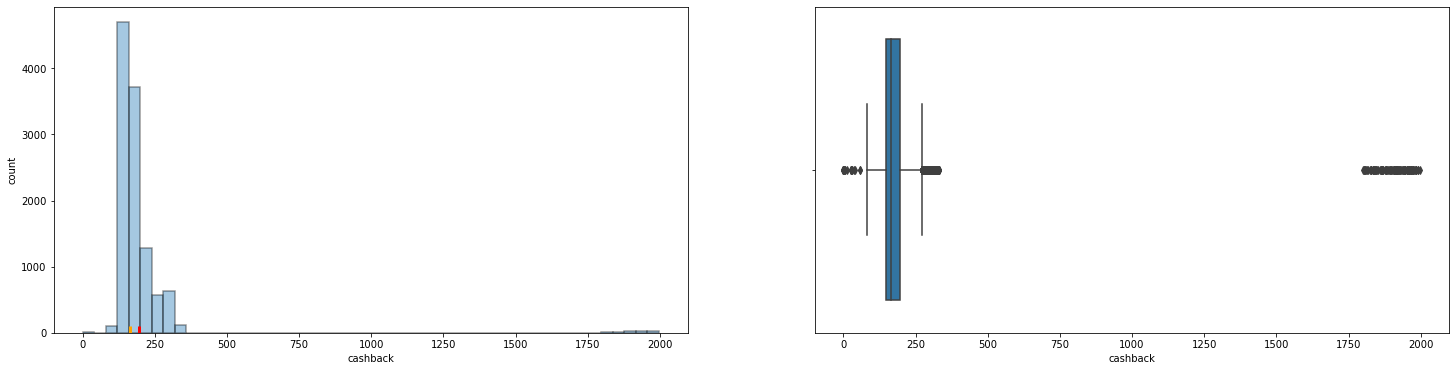

In [220]:
cont = data.select_dtypes(include = ['float64', 'int64'])
cols = list(cont.columns)
for col in cols:
    print(col)
    print('Skew:', np.round(data[col].skew(),2)) 
    plt.figure(figsize=(25,6))
    plt.subplot(1,2,1)
    sns.distplot(data[col],norm_hist=False,kde=False,hist_kws=dict(edgecolor='black',linewidth=1.5))
    plt.vlines(data[col].mean(),ymin=0, ymax=100, color = 'red', linewidth=3)
    plt.vlines(data[col].median(),ymin=0, ymax=100, color = 'orange', linewidth=3)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(data[col])
    plt.show()

<AxesSubplot:xlabel='Tenure', ylabel='count'>

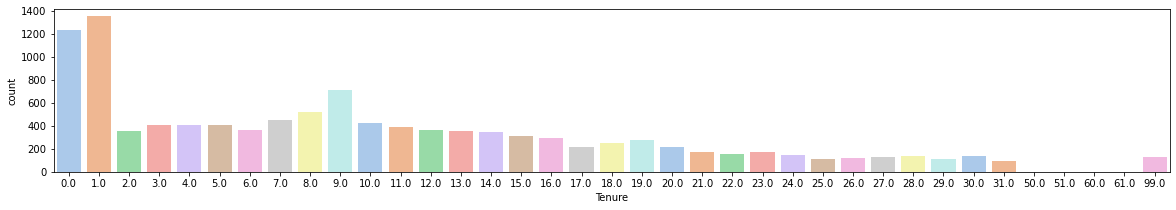

In [246]:
plt.figure(figsize=(20,3))
sns.countplot(x='Tenure', data=data, palette='pastel')

<AxesSubplot:xlabel='CC_Contacted_LY', ylabel='count'>

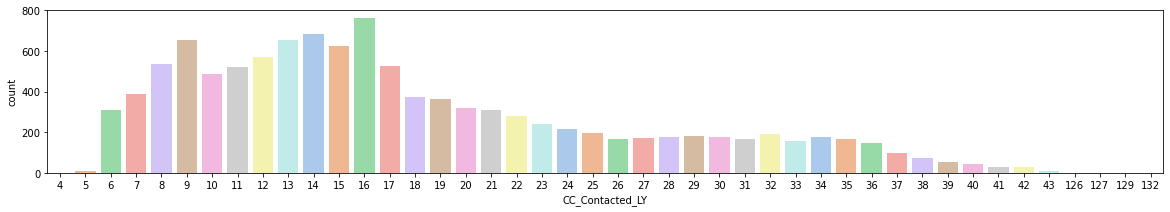

In [248]:
plt.figure(figsize=(20,3))
sns.countplot(x='CC_Contacted_LY', data=data, palette='pastel')

<AxesSubplot:xlabel='Account_user_count', ylabel='count'>

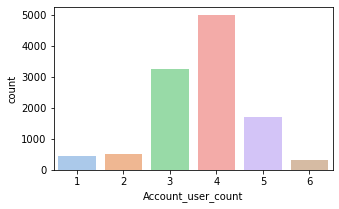

In [236]:
plt.figure(figsize=(5,3))
sns.countplot(x='Account_user_count', data=data, palette='pastel')

<AxesSubplot:xlabel='rev_per_month', ylabel='count'>

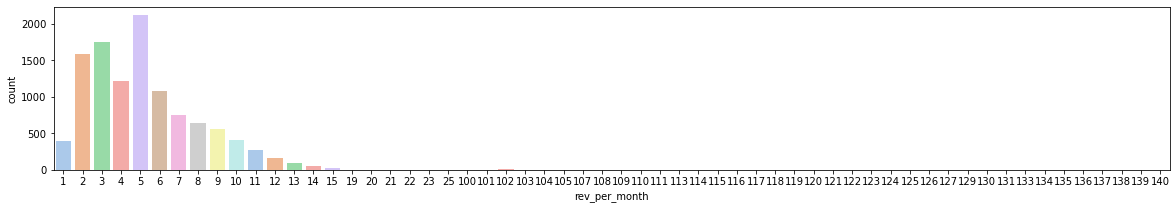

In [249]:
plt.figure(figsize=(20,3))
sns.countplot(x='rev_per_month', data=data, palette='pastel')

<AxesSubplot:xlabel='rev_growth_yoy', ylabel='count'>

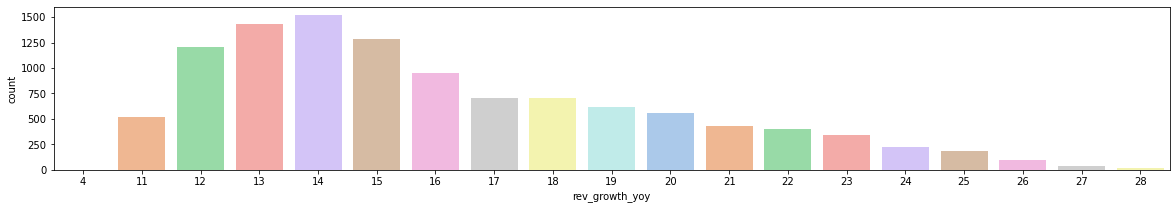

In [349]:
plt.figure(figsize=(20,3))
sns.countplot(x='rev_growth_yoy', data=data, palette='pastel')

<AxesSubplot:xlabel='coupon_used_for_payment', ylabel='count'>

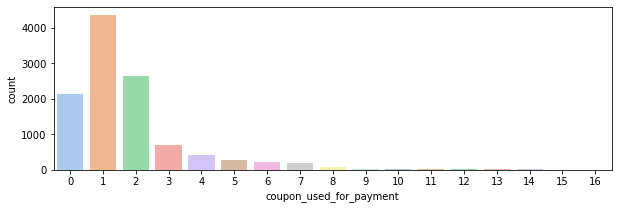

In [251]:
plt.figure(figsize=(10,3))
sns.countplot(x='coupon_used_for_payment', data=data, palette='pastel')

<AxesSubplot:xlabel='Day_Since_CC_connect', ylabel='count'>

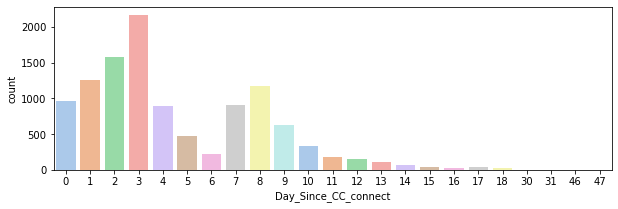

In [252]:
plt.figure(figsize=(10,3))
sns.countplot(x='Day_Since_CC_connect', data=data, palette='pastel')

<AxesSubplot:xlabel='cashback'>

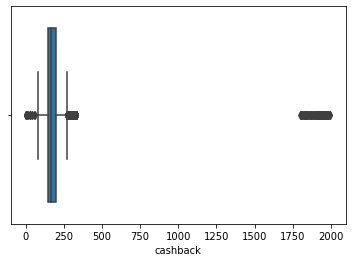

In [254]:
sns.boxplot(x='cashback', data=data)

### Univariate Analysis (Categorical Variables)

<AxesSubplot:xlabel='City_Tier', ylabel='count'>

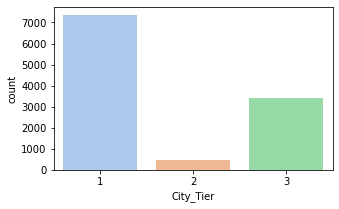

In [256]:
plt.figure(figsize=(5,3))
sns.countplot(x='City_Tier', data=data, palette='pastel')

<AxesSubplot:xlabel='Payment', ylabel='count'>

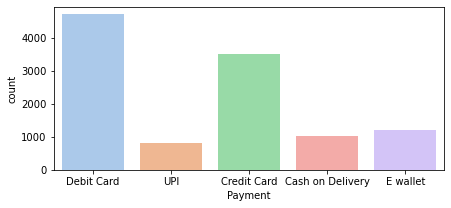

In [258]:
plt.figure(figsize=(7,3))
sns.countplot(x='Payment', data=data, palette='pastel')

<AxesSubplot:xlabel='Gender', ylabel='count'>

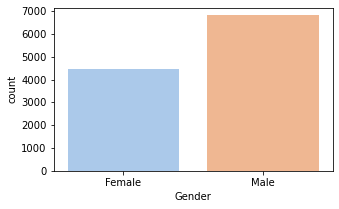

In [255]:
plt.figure(figsize=(5,3))
sns.countplot(x='Gender', data=data, palette='pastel')

<AxesSubplot:xlabel='Service_Score', ylabel='count'>

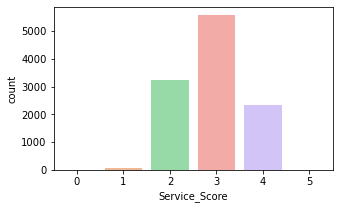

In [261]:
plt.figure(figsize=(5,3))
sns.countplot(x='Service_Score', data=data, palette='pastel')

<AxesSubplot:xlabel='account_segment', ylabel='count'>

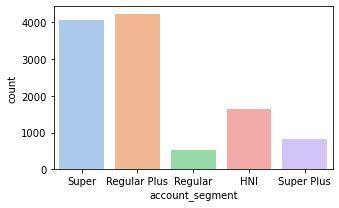

In [262]:
plt.figure(figsize=(5,3))
sns.countplot(x='account_segment', data=data, palette='pastel')

<AxesSubplot:xlabel='CC_Agent_Score', ylabel='count'>

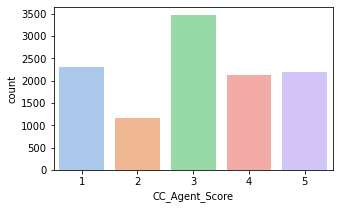

In [263]:
plt.figure(figsize=(5,3))
sns.countplot(x='CC_Agent_Score', data=data, palette='pastel')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

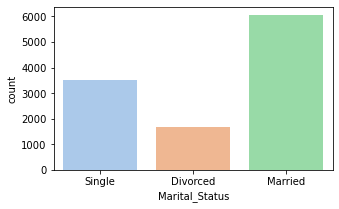

In [264]:
plt.figure(figsize=(5,3))
sns.countplot(x='Marital_Status', data=data, palette='pastel')

<AxesSubplot:xlabel='Complain_ly', ylabel='count'>

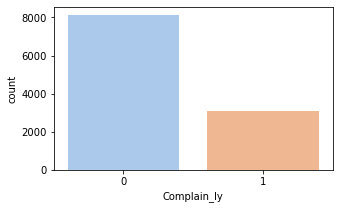

In [265]:
plt.figure(figsize=(5,3))
sns.countplot(x='Complain_ly', data=data, palette='pastel')

<AxesSubplot:xlabel='Login_device', ylabel='count'>

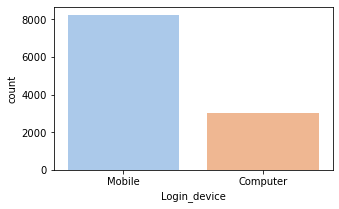

In [266]:
plt.figure(figsize=(5,3))
sns.countplot(x='Login_device', data=data, palette='pastel')

## Bivariate Analysis (Numerical Variables)

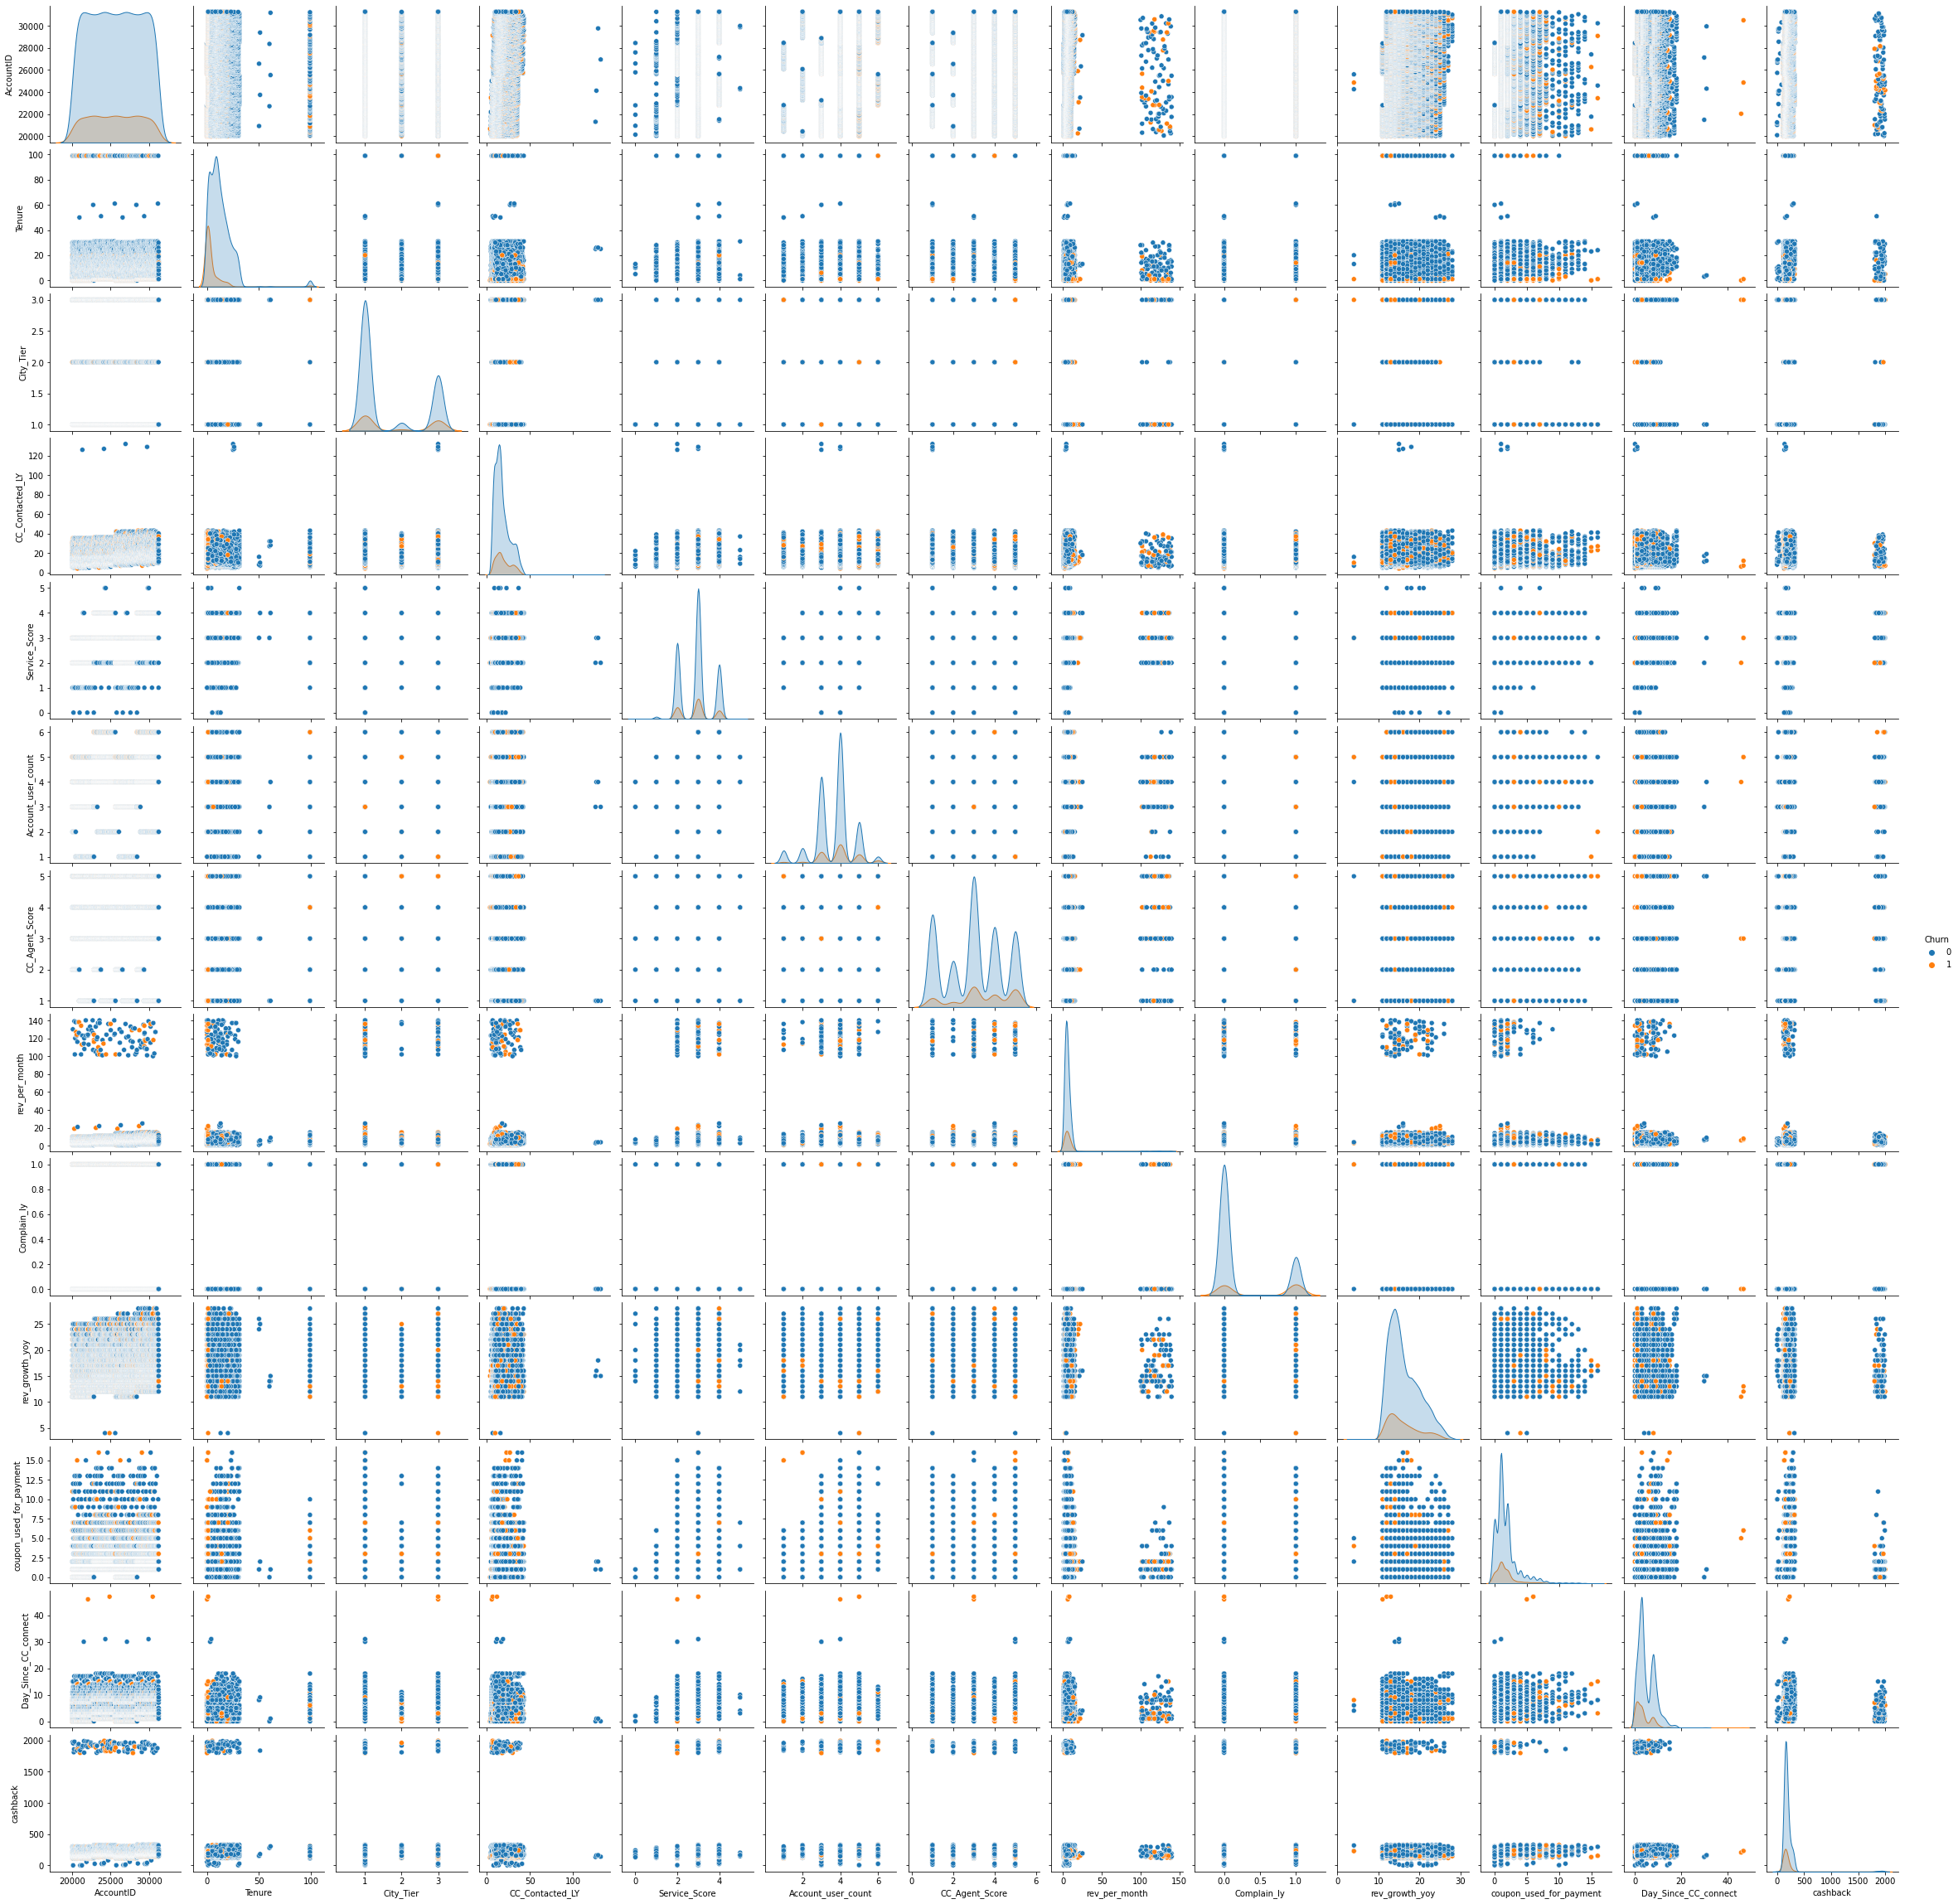

In [308]:
sns.pairplot(data, hue ='Churn')

In [346]:
data_plot = data[['Tenure', 'Churn', 'CC_Contacted_LY', 'Account_user_count', 'rev_per_month', 
                  'rev_growth_yoy', 'coupon_used_for_payment','Day_Since_CC_connect','cashback']]
data_plot.head()

,Tenure,Churn,CC_Contacted_LY,Account_user_count,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
0,4,1,6,3,9,11,1,5,159.93
1,0,1,8,4,7,15,0,0,120.90
2,0,1,30,4,6,14,0,3,165.25
3,0,1,15,4,8,23,0,3,134.07
4,0,1,12,3,3,11,1,3,129.60


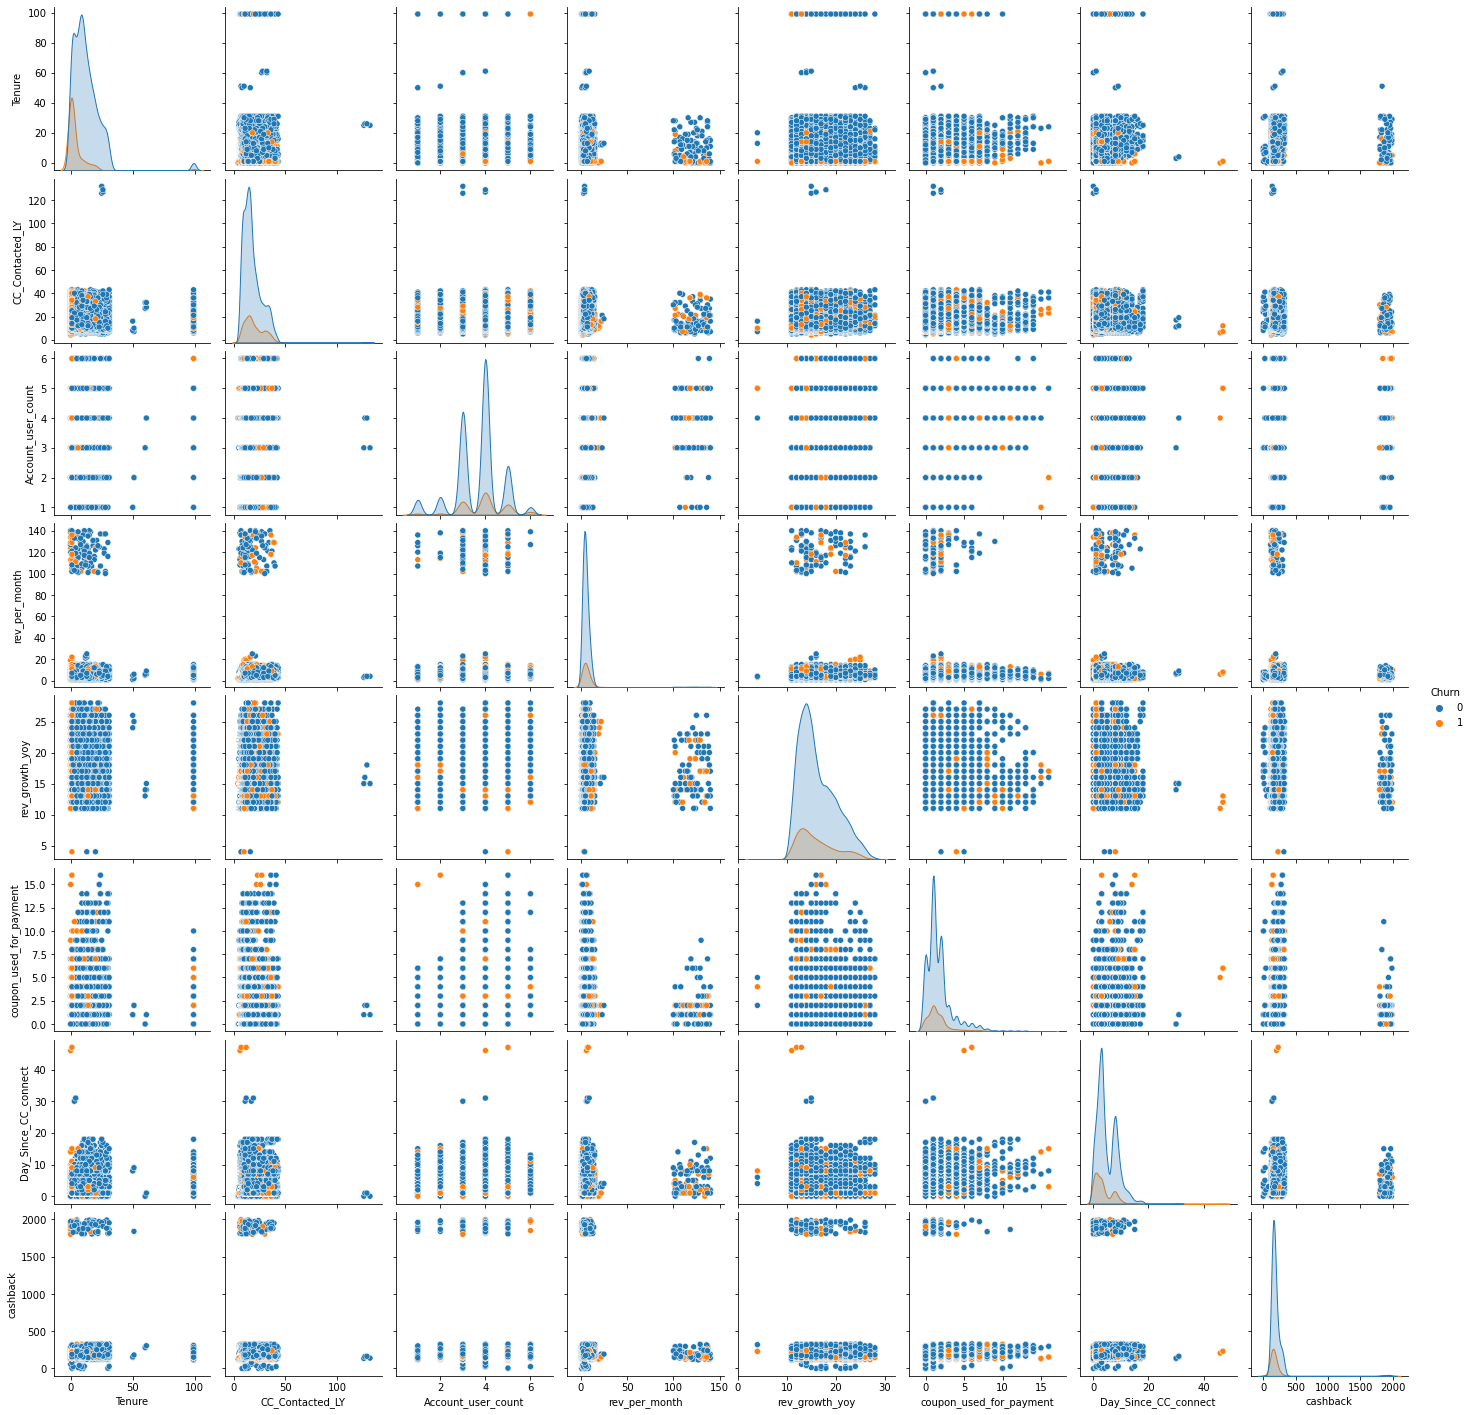

In [347]:
sns.pairplot(data_plot, hue ='Churn')

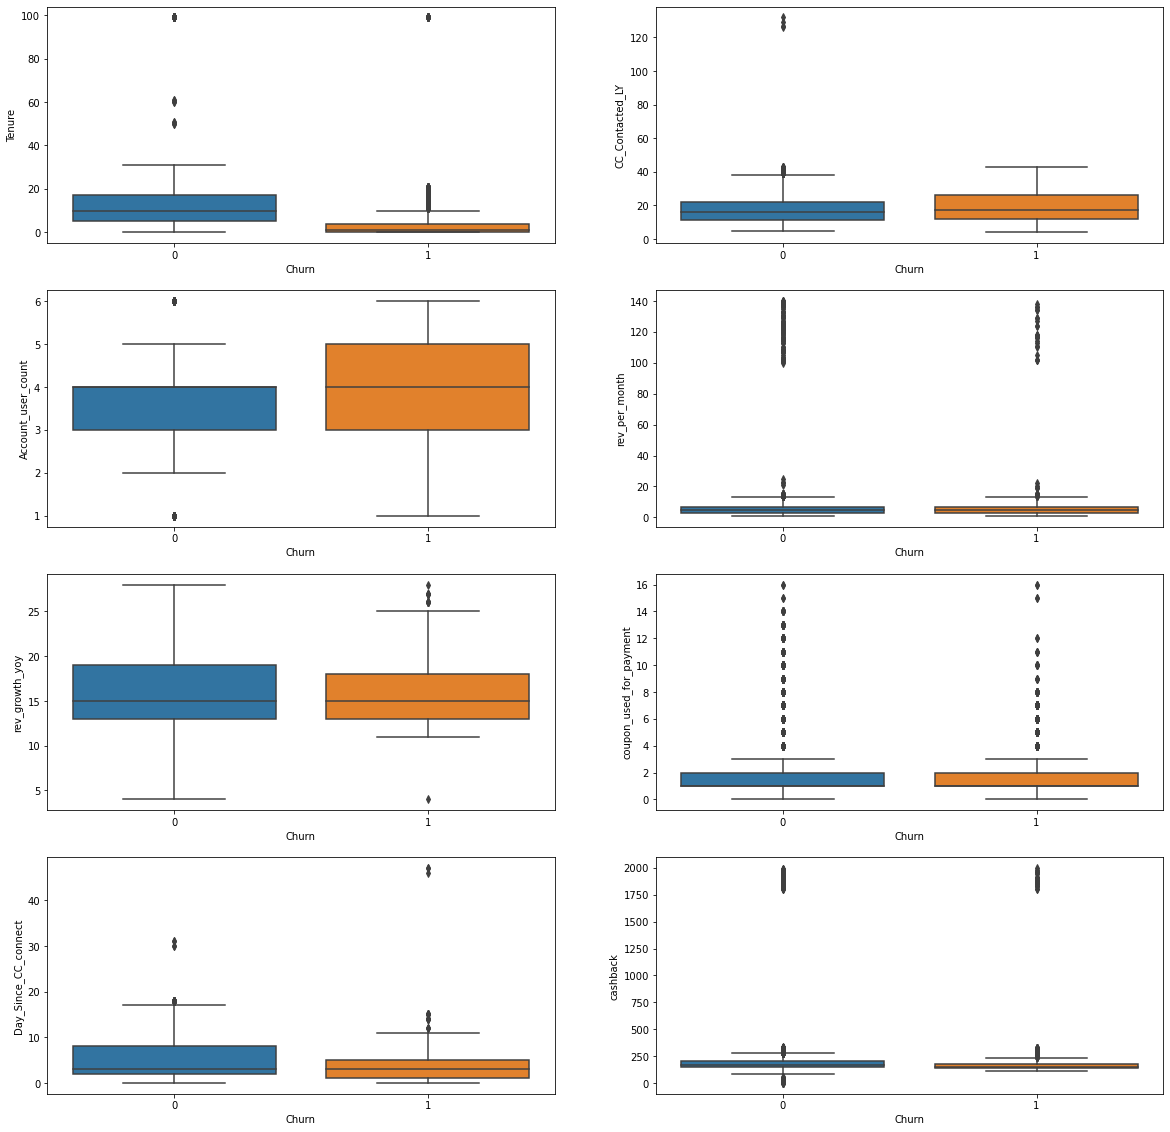

In [274]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,20) 
a = sns.boxplot(x='Churn', y='Tenure', data=data, ax = axes[0][0])
a = sns.boxplot(x='Churn', y='CC_Contacted_LY', data=data, ax = axes[0][1])
a = sns.boxplot(x='Churn', y='Account_user_count', data=data, ax=axes[1][0])
a = sns.boxplot(x='Churn', y='rev_per_month', data=data, ax=axes[1][1])
a = sns.boxplot(x='Churn', y='rev_growth_yoy', data=data, ax = axes[2][0])
a = sns.boxplot(x='Churn', y='coupon_used_for_payment', data=data, ax = axes[2][1])
a = sns.boxplot(x='Churn', y='Day_Since_CC_connect', data=data, ax = axes[3][0])
a = sns.boxplot(x='Churn', y='cashback', data=data, ax = axes[3][1])

## Bivariate Analysis (Categorical Variables)

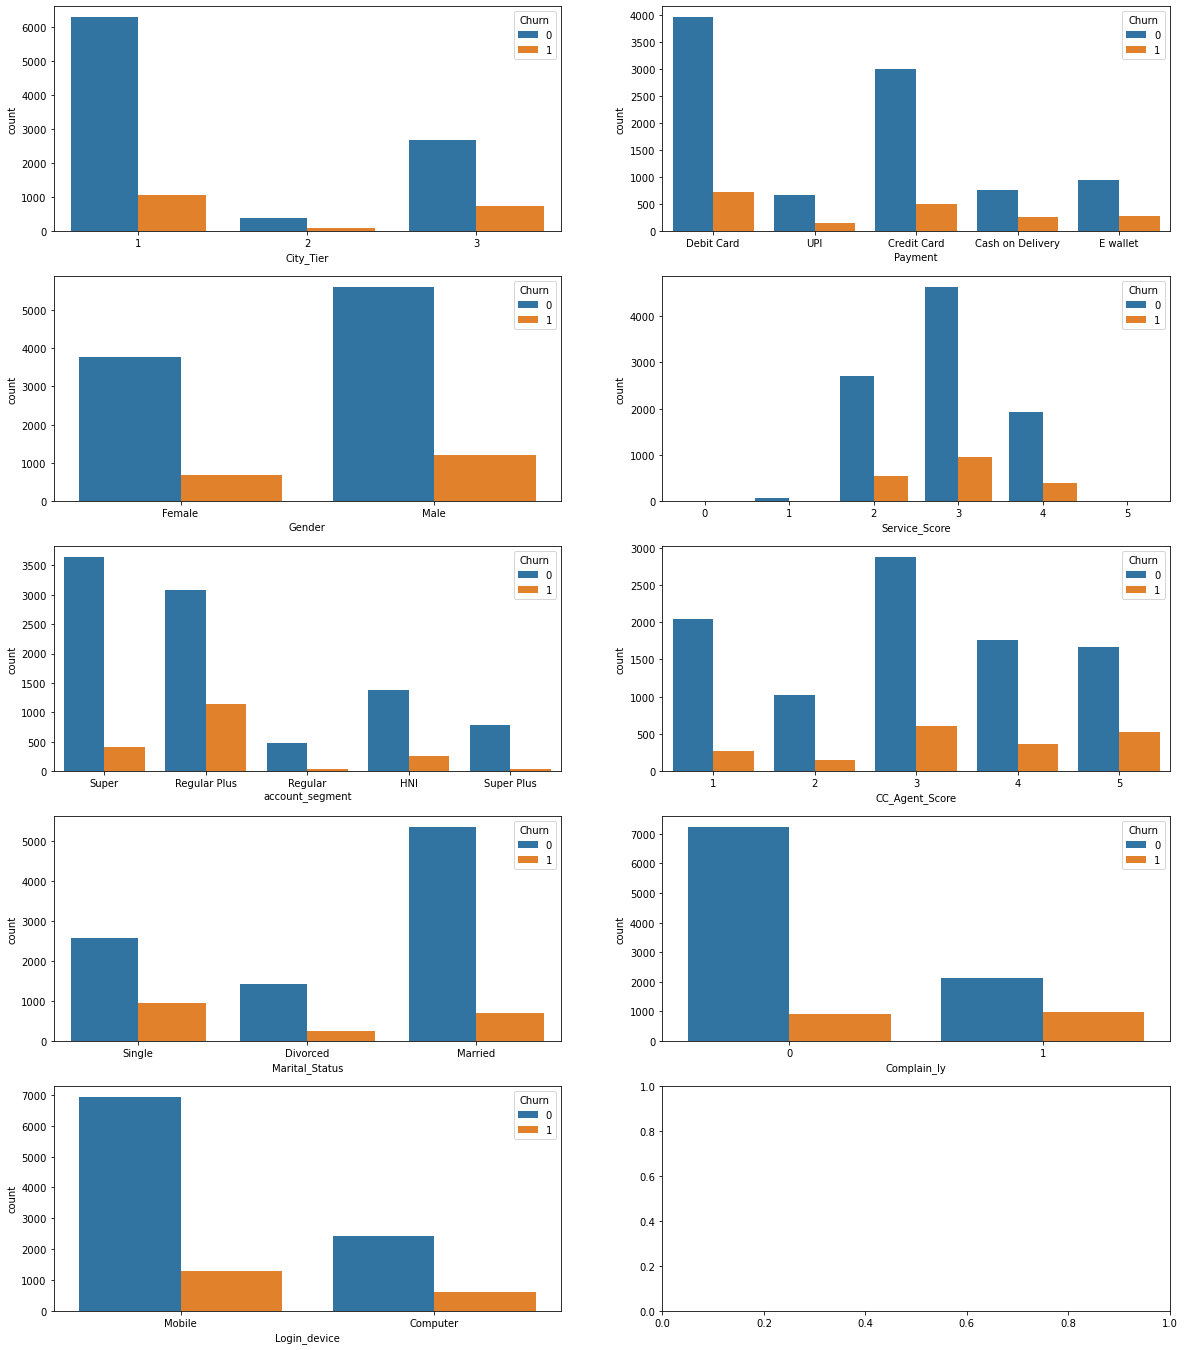

In [292]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,24) 
a = sns.countplot(x='City_Tier', hue='Churn', data=data, ax = axes[0][0])
a = sns.countplot(x='Payment', hue='Churn', data=data, ax = axes[0][1])
a = sns.countplot(x='Gender', hue='Churn', data=data, ax=axes[1][0])
a = sns.countplot(x='Service_Score', hue='Churn', data=data, ax=axes[1][1])
a = sns.countplot(x='account_segment', hue='Churn', data=data, ax = axes[2][0])
a = sns.countplot(x='CC_Agent_Score', hue='Churn', data=data, ax = axes[2][1])
a = sns.countplot(x='Marital_Status', hue='Churn', data=data, ax = axes[3][0])
a = sns.countplot(x='Complain_ly', hue='Churn', data=data, ax = axes[3][1])
a = sns.countplot(x='Login_device', hue='Churn', data=data, ax = axes[4][0])

## Multivariate Analysis (HeatMap)

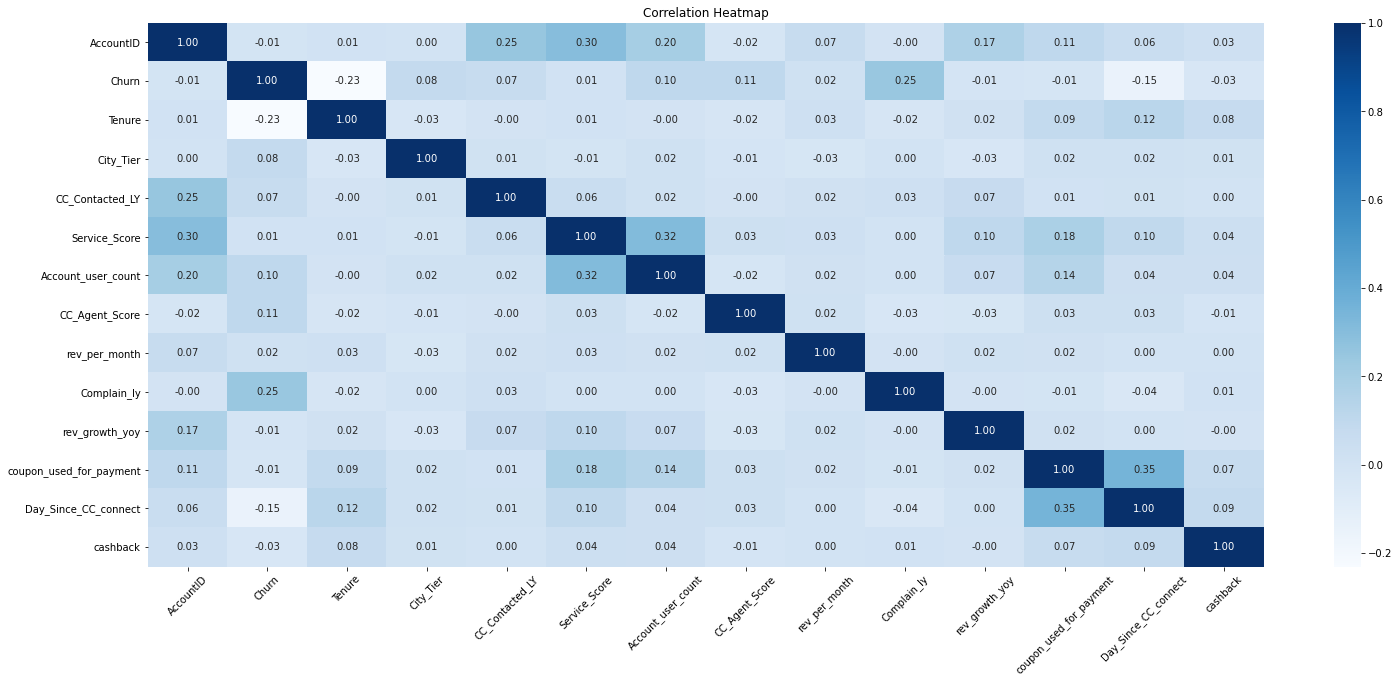

In [306]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f", cmap='Blues')
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  int64  
 3   City_Tier                11260 non-null  int64  
 4   CC_Contacted_LY          11260 non-null  int64  
 5   Payment                  11260 non-null  object 
 6   Gender                   11260 non-null  object 
 7   Service_Score            11260 non-null  int64  
 8   Account_user_count       11260 non-null  int64  
 9   account_segment          11260 non-null  object 
 10  CC_Agent_Score           11260 non-null  int64  
 11  Marital_Status           11260 non-null  object 
 12  rev_per_month            11260 non-null  int64  
 13  Complain_ly              11260 non-null  int64  
 14  rev_growth_yoy        

### Encoding the Object Variables (using Label Encoding)

In [317]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: Payment
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']
Categories (5, object): ['Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI']
[2 4 1 0 3]


feature: Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]


feature: account_segment
['Super', 'Regular Plus', 'Regular', 'HNI', 'Super Plus']
Categories (5, object): ['HNI', 'Regular', 'Regular Plus', 'Super', 'Super Plus']
[3 2 1 0 4]


feature: Marital_Status
['Single', 'Divorced', 'Married']
Categories (3, object): ['Divorced', 'Married', 'Single']
[2 0 1]


feature: Login_device
['Mobile', 'Computer']
Categories (2, object): ['Computer', 'Mobile']
[1 0]


In [318]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  int64  
 3   City_Tier                11260 non-null  int64  
 4   CC_Contacted_LY          11260 non-null  int64  
 5   Payment                  11260 non-null  int8   
 6   Gender                   11260 non-null  int8   
 7   Service_Score            11260 non-null  int64  
 8   Account_user_count       11260 non-null  int64  
 9   account_segment          11260 non-null  int8   
 10  CC_Agent_Score           11260 non-null  int64  
 11  Marital_Status           11260 non-null  int8   
 12  rev_per_month            11260 non-null  int64  
 13  Complain_ly              11260 non-null  int64  
 14  rev_growth_yoy        

### Outlier Treatment

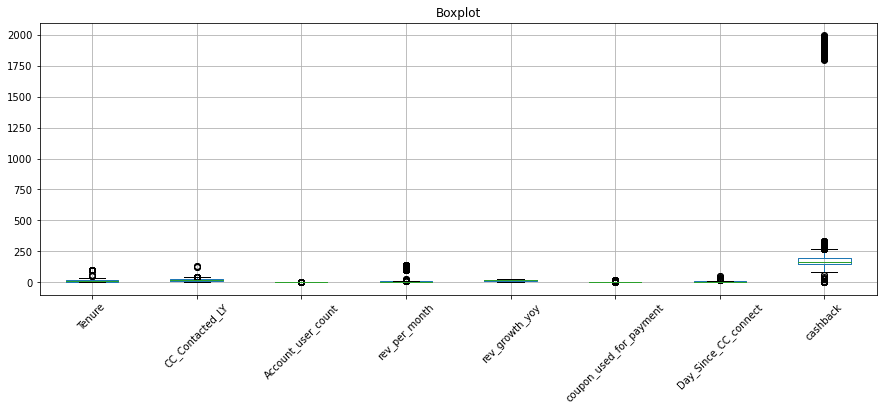

In [341]:
data[['Tenure', 'CC_Contacted_LY', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment',
      'Day_Since_CC_connect','cashback']].boxplot(figsize=(15,5))
plt.title("Boxplot")
plt.xticks(rotation=45)
plt.show()

In [332]:
Q1 = data.quantile(0.05)
Q3 = data.quantile(0.95)
IQR = Q3 - Q1
pd.DataFrame((((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()/data.shape[0]*100))

,0
AccountID,0.00
Churn,0.00
Tenure,1.16
City_Tier,0.00
CC_Contacted_LY,0.04
Payment,0.00
Gender,0.00
Service_Score,0.00
Account_user_count,0.00
account_segment,0.00


### Split Data Keeping Outliers (xo & yo)

In [333]:
xo = data.drop(['Churn','AccountID'], axis = 1)
yo = data['Churn']

In [334]:
xo.shape

(11260, 17)

In [335]:
yo.shape

(11260,)

### Split Data to Remove Outliers (x & y)

In [336]:
x = data.drop(['Churn','AccountID'], axis = 1)
y = data['Churn']

In [337]:
x.shape

(11260, 17)

In [338]:
y.shape

(11260,)

In [339]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.05,0.95])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [343]:
lw,up=remove_outlier(x['Tenure'])
x['Tenure']=np.where(x['Tenure']>up,up,x['Tenure'])
x['Tenure']=np.where(x['Tenure']<lw,lw,x['Tenure'])

lw,up=remove_outlier(x['CC_Contacted_LY'])
x['CC_Contacted_LY']=np.where(x['CC_Contacted_LY']>up,up,x['CC_Contacted_LY'])
x['CC_Contacted_LY']=np.where(x['CC_Contacted_LY']<lw,lw,x['CC_Contacted_LY'])

lw,up=remove_outlier(x['rev_per_month'])
x['rev_per_month']=np.where(x['rev_per_month']>up,up,x['rev_per_month'])
x['rev_per_month']=np.where(x['rev_per_month']<lw,lw,x['rev_per_month'])

lw,up=remove_outlier(x['coupon_used_for_payment'])
x['coupon_used_for_payment']=np.where(x['coupon_used_for_payment']>up,up,x['coupon_used_for_payment'])
x['coupon_used_for_payment']=np.where(x['coupon_used_for_payment']<lw,lw,x['coupon_used_for_payment'])

lw,up=remove_outlier(x['Day_Since_CC_connect'])
x['Day_Since_CC_connect']=np.where(x['Day_Since_CC_connect']>up,up,x['Day_Since_CC_connect'])
x['Day_Since_CC_connect']=np.where(x['Day_Since_CC_connect']<lw,lw,x['Day_Since_CC_connect'])

lw,up=remove_outlier(x['cashback'])
x['cashback']=np.where(x['cashback']>up,up,x['cashback'])
x['cashback']=np.where(x['cashback']<lw,lw,x['cashback'])

x.shape

(11260, 17)

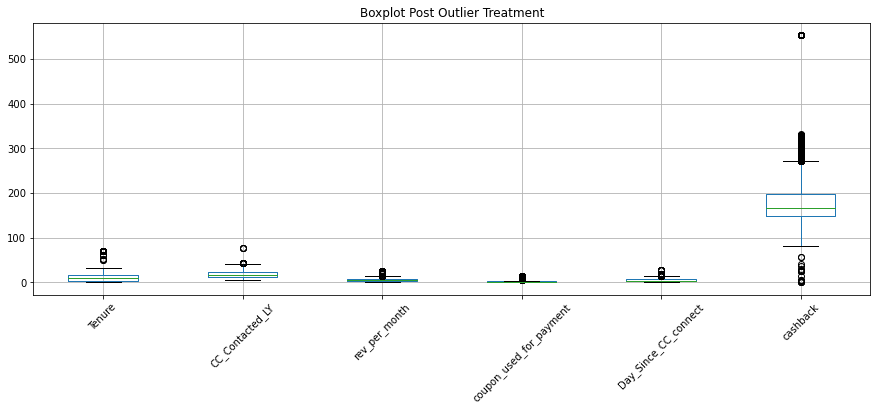

In [345]:
x[['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'coupon_used_for_payment','Day_Since_CC_connect',
   'cashback']].boxplot(figsize=(15,5))
plt.title("Boxplot Post Outlier Treatment")
plt.xticks(rotation=45)
plt.show()

### K-Means Clustering 

In [361]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [352]:
df = data.drop(['AccountID'], axis = 1)

In [353]:
df_scaled = StandardScaler().fit_transform(df)

In [354]:
df_scaled

array([[ 2.22234528, -0.54761286,  1.48191371, ...,  0.11473932,
        -0.20006117,  0.60512252],
       [ 2.22234528, -0.86116701, -0.70933361, ..., -1.25531872,
        -0.42312786,  0.60512252],
       [ 2.22234528, -0.86116701, -0.70933361, ..., -0.4332839 ,
        -0.16965597,  0.60512252],
       ...,
       [-0.44997508, -0.78277847, -0.70933361, ..., -0.15927229,
        -0.02008756,  0.60512252],
       [-0.44997508,  0.94176936,  1.48191371, ...,  1.21078575,
        -0.08592738, -1.65255791],
       [-0.44997508, -0.23405871, -0.70933361, ..., -0.4332839 ,
        -0.11370356,  0.60512252]])

### Calculating WSS for values of K - Elbow Method

In [355]:
wss =[]

In [356]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

In [357]:
wss

[202680.0000000002,
 189123.20187858335,
 178921.24167248802,
 171990.45733854486,
 158543.1243746025,
 155349.7426388408,
 151777.27212788898,
 141509.88882323386,
 139380.2544146019,
 132391.98663643817]

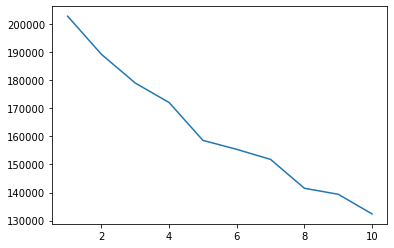

In [358]:
plt.plot(range(1,11), wss)

In [385]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(df_scaled)
labels = k_means.labels_

In [386]:
silhouette_score(df_scaled,labels)

0.12336437604603798

In [363]:
silhouette_samples(df_scaled,labels).min()

0.0013580240285513245

In [368]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_scaled)
labels = k_means.labels_

In [369]:
silhouette_score(df_scaled,labels)

0.07424420609512918

In [370]:
silhouette_samples(df_scaled,labels).min()

-0.17533947454568208

In [375]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scaled)
labels = k_means.labels_

In [372]:
silhouette_score(df_scaled,labels)

0.0742940376682887

In [373]:
silhouette_samples(df_scaled,labels).min()

-0.07283738766512156

In [374]:
df["df_kmeans2"] = labels
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,df_kmeans3
0,1,4,3,6,2,0,3,3,3,2,2,9,1,11,1,5,159.93,1,0
1,1,0,1,8,4,1,3,4,2,3,2,7,1,15,0,0,120.90,1,0
2,1,0,1,30,2,1,2,4,2,3,2,6,1,14,0,3,165.25,1,0
3,1,0,3,15,2,1,2,4,3,5,2,8,0,23,0,3,134.07,1,0
4,1,0,1,12,1,1,2,3,2,5,2,3,0,11,1,3,129.60,1,0


In [376]:
df.df_kmeans3.value_counts().sort_index()

0    1841
1    4535
2    4884
Name: df_kmeans3, dtype: int64

In [377]:
clust_profile=df
clust_profile=clust_profile.groupby('df_kmeans3').mean()
clust_profile['df_cust_segment']=df.df_kmeans3.value_counts().sort_index()
np.round(clust_profile,2)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,df_cust_segment
df_kmeans3,,,,,,,,,,,,,,,,,,,
0,1.00,3.11,1.82,19.33,1.78,0.64,2.91,3.92,1.99,3.40,1.38,6.87,0.53,16.13,1.63,3.24,179.92,0.68,1841
1,0.01,14.19,1.64,18.55,1.79,0.58,3.36,4.22,2.11,3.05,1.07,6.78,0.22,16.92,2.72,6.24,220.77,0.73,4535
2,0.00,10.98,1.59,16.64,1.73,0.62,2.48,3.14,2.29,2.95,1.17,5.56,0.23,15.55,0.98,3.55,176.61,0.75,4884


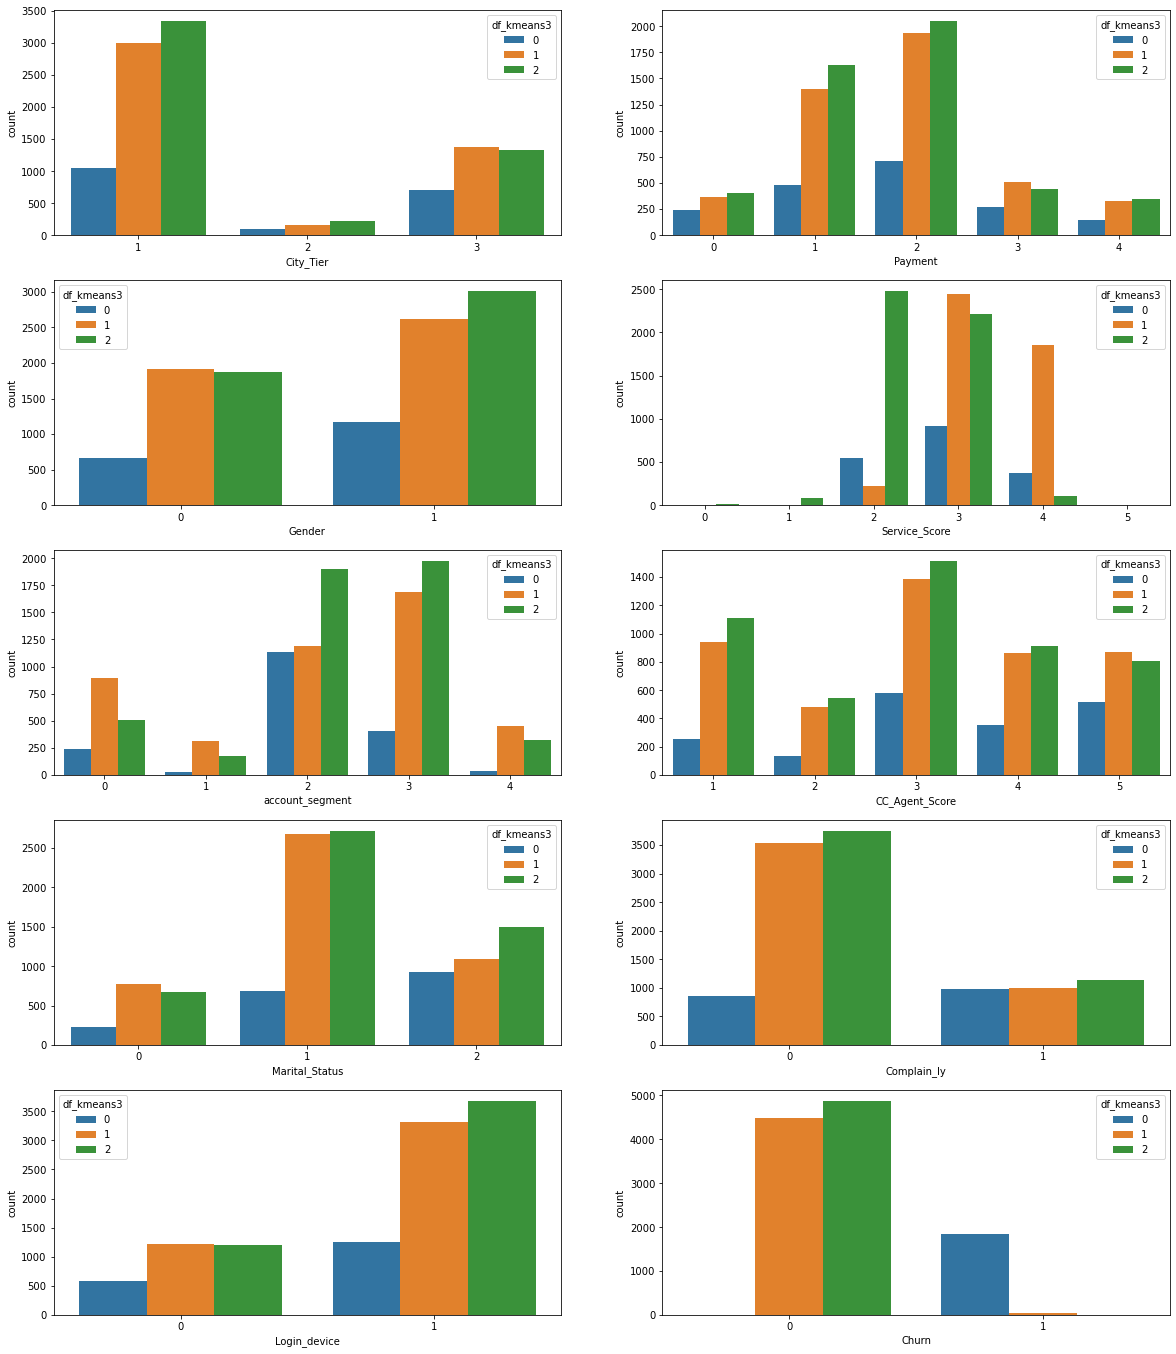

In [384]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,24) 
a = sns.countplot(x='City_Tier', hue='df_kmeans3', data=df, ax = axes[0][0])
a = sns.countplot(x='Payment', hue='df_kmeans3', data=df, ax = axes[0][1])
a = sns.countplot(x='Gender', hue='df_kmeans3', data=df, ax=axes[1][0])
a = sns.countplot(x='Service_Score', hue='df_kmeans3', data=df, ax=axes[1][1])
a = sns.countplot(x='account_segment', hue='df_kmeans3', data=df, ax = axes[2][0])
a = sns.countplot(x='CC_Agent_Score', hue='df_kmeans3', data=df, ax = axes[2][1])
a = sns.countplot(x='Marital_Status', hue='df_kmeans3', data=df, ax = axes[3][0])
a = sns.countplot(x='Complain_ly', hue='df_kmeans3', data=df, ax = axes[3][1])
a = sns.countplot(x='Login_device', hue='df_kmeans3', data=df, ax = axes[4][0])
a = sns.countplot(x='Churn', hue='df_kmeans3', data=df, ax = axes[4][1])

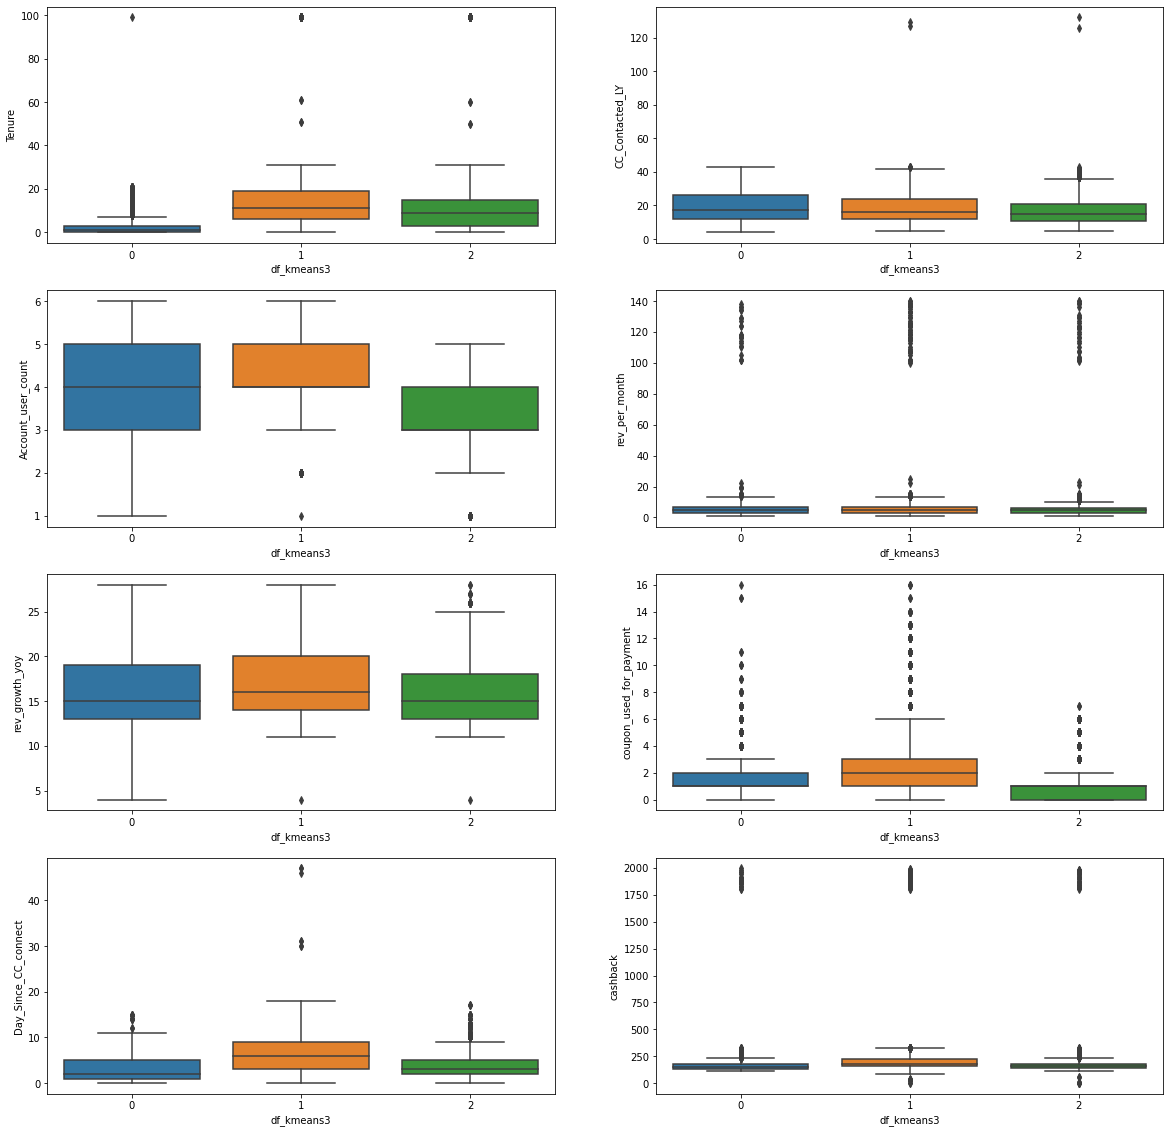

In [389]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,20) 
a = sns.boxplot(x='df_kmeans3', y='Tenure', data=df, ax = axes[0][0])
a = sns.boxplot(x='df_kmeans3', y='CC_Contacted_LY', data=df, ax = axes[0][1])
a = sns.boxplot(x='df_kmeans3', y='Account_user_count', data=df, ax=axes[1][0])
a = sns.boxplot(x='df_kmeans3', y='rev_per_month', data=df, ax=axes[1][1])
a = sns.boxplot(x='df_kmeans3', y='rev_growth_yoy', data=df, ax = axes[2][0])
a = sns.boxplot(x='df_kmeans3', y='coupon_used_for_payment', data=df, ax = axes[2][1])
a = sns.boxplot(x='df_kmeans3', y='Day_Since_CC_connect', data=df, ax = axes[3][0])
a = sns.boxplot(x='df_kmeans3', y='cashback', data=df, ax = axes[3][1])

In [378]:
df.to_csv('df_Capstone_Kmeans.csv',index=False)

# The End